In [129]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [130]:
import sqlite3
import pandas as pd

def sql_query_df(dataframes: dict, query: str):
    # Create an in-memory SQLite database connection
    connection = sqlite3.connect(':memory:')

    try:
        # Iterate over each dataframe in the list
        for table_name, dataframe in dataframes.items():
            # Convert the dataframe to an SQLite table
            dataframe.to_sql(table_name, con=connection, if_exists="replace", index=False)

        # Execute the provided SQL query on the transformed data
        cursor = connection.cursor()
        cursor.execute(query)

        # Fetch all the results from the query
        results = cursor.fetchall()

        # Get the column names from the query results
        column_names = [desc[0] for desc in cursor.description]

        # Create a new DataFrame from the query results
        transformed_data = pd.DataFrame(results, columns=column_names)

        return transformed_data

    finally:
        # Close the cursor and connection
        cursor.close()
        connection.close()

### SET PLOTTING METRIC

In [66]:
plotting_metric = 'manhattan'
# plotting_metric = 'clr'
# plotting_metric = 'cosine'
# plotting_metric = 'minkowski_0.25'
# plotting_metric = 'minkowski_0.5'
# plotting_metric = 'minkowski_0.75'
# plotting_metric = 'minkowski_1.0'
# plotting_metric = 'minkowski_1.5'
# plotting_metric = 'minkowski_2.0'
# plotting_metric = 'minkowski_3.0'
# plotting_metric = 'minkowski_4.0'
# plotting_metric = 'minkowski_5.0'
# plotting_metric = 'euclidean'

In [67]:
df_stats = pd.read_csv('./scan_stats_v2.csv')
# df_stats = pd.read_csv('./scan_stats_clr.csv')
# df_stats = pd.read_csv('./scan_stats_metrics2.csv')
# df_stats = pd.read_csv('./scan_stats_sklearn_distance.csv')
# df_stats = pd.read_csv('./scan_stats_sklearn_distance_v2.csv')

In [68]:
df_stats['metric'].unique()

array(['manhattan'], dtype=object)

In [69]:
df_stats

partition_type dimensionality     metric                      graph  nns  \
0               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    3   
1               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
2               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
3               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
4               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
...             ...            ...        ...                        ...  ...   
2416            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2417            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2418            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2419            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2420            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
0     leiden_cpm      0.600          0.024511    0.421401       7773   
1     leiden_cpm      0.005         -0.055707    0.998193       2886   
2     leiden_cpm      0.010         -0.052529    0.996190       2922   
3     leiden_cpm      0.015         -0.048919    0.993040       2978   
4     leiden_cpm      0.020         -0.044698    0.989024       3049   
...          ...        ...               ...         ...        ...   
2416  leiden_cpm      1.080          0.046101    0.075656      10146   
2417  leiden_cpm      1.085          0.045810    0.075430      10160   
2418  leiden_cpm      1.090          0.045718    0.075125      10177   
2419  leiden_cpm      1.095          0.045473    0.074860      10194   
2420  leiden_cpm      1.100          0.045130    0.074403      10226   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
0              2.614949                  2.0         0.828116   
1              7.042966                  5.0         6.253001   
2              6.956194                  5.0         5.713212   
3              6.825386                  5.0         5.162022   
4              6.666448                  5.0         4.647135   
...                 ...                  ...              ...   
2416           2.003351                  2.0         0.800274   
2417           2.000591                  2.0         0.798251   
2418           1.997249                  2.0         0.794988   
2419           1.993918                  2.0         0.792204   
2420           1.987678                  2.0         0.788786   

      nenriched_clusters  mean_enriched_cluster_size  \
0                    494                    3.016194   
1                    375                    8.810667   
2                    375                    8.373333   
3                    382                    7.965969   
4                    380                    7.497368   
...                  ...                         ...   
2416                 468                    2.803419   
2417                 467                    2.802998   
2418                 468                    2.792735   
2419                 469                    2.780384   
2420                 475                    2.772632   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
0                              3.0                  0.839161   
1                              6.0                  7.540037   
2                              6.0                  6.572211   
3                              6.0                  5.608183   
4                              6.0                  4.899784   
...                            ...                       ...   
2416                           3.0                  0.879387   
2417                           3.0                  0.882710   
2418                           3.0                  0.875711   
2419                           3.0                  0.869256   
2420     

In [70]:
df_stats.drop_duplicates(subset=df_stats.columns.difference(['datetime']), inplace=True)

In [71]:
df_stats

partition_type dimensionality     metric                      graph  nns  \
0               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    3   
1               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
2               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
3               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
4               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
...             ...            ...        ...                        ...  ...   
2416            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2417            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2418            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2419            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2420            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
0     leiden_cpm      0.600          0.024511    0.421401       7773   
1     leiden_cpm      0.005         -0.055707    0.998193       2886   
2     leiden_cpm      0.010         -0.052529    0.996190       2922   
3     leiden_cpm      0.015         -0.048919    0.993040       2978   
4     leiden_cpm      0.020         -0.044698    0.989024       3049   
...          ...        ...               ...         ...        ...   
2416  leiden_cpm      1.080          0.046101    0.075656      10146   
2417  leiden_cpm      1.085          0.045810    0.075430      10160   
2418  leiden_cpm      1.090          0.045718    0.075125      10177   
2419  leiden_cpm      1.095          0.045473    0.074860      10194   
2420  leiden_cpm      1.100          0.045130    0.074403      10226   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
0              2.614949                  2.0         0.828116   
1              7.042966                  5.0         6.253001   
2              6.956194                  5.0         5.713212   
3              6.825386                  5.0         5.162022   
4              6.666448                  5.0         4.647135   
...                 ...                  ...              ...   
2416           2.003351                  2.0         0.800274   
2417           2.000591                  2.0         0.798251   
2418           1.997249                  2.0         0.794988   
2419           1.993918                  2.0         0.792204   
2420           1.987678                  2.0         0.788786   

      nenriched_clusters  mean_enriched_cluster_size  \
0                    494                    3.016194   
1                    375                    8.810667   
2                    375                    8.373333   
3                    382                    7.965969   
4                    380                    7.497368   
...                  ...                         ...   
2416                 468                    2.803419   
2417                 467                    2.802998   
2418                 468                    2.792735   
2419                 469                    2.780384   
2420                 475                    2.772632   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
0                              3.0                  0.839161   
1                              6.0                  7.540037   
2                              6.0                  6.572211   
3                              6.0                  5.608183   
4                              6.0                  4.899784   
...                            ...                       ...   
2416                           3.0                  0.879387   
2417                           3.0                  0.882710   
2418                           3.0                  0.875711   
2419                           3.0                  0.869256   
2420     

In [138]:
sql_query_df({'scan_stats_df': df_stats}, 'select max(parameter) from scan_stats_df')

max(parameter)
0             1.1

In [139]:
sql_query_df({'scan_stats_df': df_stats}, 'select min(parameter) from scan_stats_df')

min(parameter)
0           0.005

In [149]:
sql_query_df({'scan_stats_df': df_stats}, 'select count(distinct parameter) from scan_stats_df')

count(distinct parameter)
0                        220

In [72]:
def compute_num_clusters_fraction_of_genes_enriched(row):
    return row['nenriched_clusters'] * (row['nenriched_cluster_genes'] / 20326)

In [73]:
df_stats['num_clusters_fraction_of_genes_enriched'] = df_stats.apply(compute_num_clusters_fraction_of_genes_enriched, axis=1)

In [74]:
df_stats

partition_type dimensionality     metric                      graph  nns  \
0               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    3   
1               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
2               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
3               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
4               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
...             ...            ...        ...                        ...  ...   
2416            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2417            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2418            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2419            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2420            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
0     leiden_cpm      0.600          0.024511    0.421401       7773   
1     leiden_cpm      0.005         -0.055707    0.998193       2886   
2     leiden_cpm      0.010         -0.052529    0.996190       2922   
3     leiden_cpm      0.015         -0.048919    0.993040       2978   
4     leiden_cpm      0.020         -0.044698    0.989024       3049   
...          ...        ...               ...         ...        ...   
2416  leiden_cpm      1.080          0.046101    0.075656      10146   
2417  leiden_cpm      1.085          0.045810    0.075430      10160   
2418  leiden_cpm      1.090          0.045718    0.075125      10177   
2419  leiden_cpm      1.095          0.045473    0.074860      10194   
2420  leiden_cpm      1.100          0.045130    0.074403      10226   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
0              2.614949                  2.0         0.828116   
1              7.042966                  5.0         6.253001   
2              6.956194                  5.0         5.713212   
3              6.825386                  5.0         5.162022   
4              6.666448                  5.0         4.647135   
...                 ...                  ...              ...   
2416           2.003351                  2.0         0.800274   
2417           2.000591                  2.0         0.798251   
2418           1.997249                  2.0         0.794988   
2419           1.993918                  2.0         0.792204   
2420           1.987678                  2.0         0.788786   

      nenriched_clusters  mean_enriched_cluster_size  \
0                    494                    3.016194   
1                    375                    8.810667   
2                    375                    8.373333   
3                    382                    7.965969   
4                    380                    7.497368   
...                  ...                         ...   
2416                 468                    2.803419   
2417                 467                    2.802998   
2418                 468                    2.792735   
2419                 469                    2.780384   
2420                 475                    2.772632   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
0                              3.0                  0.839161   
1                              6.0                  7.540037   
2                              6.0                  6.572211   
3                              6.0                  5.608183   
4                              6.0                  4.899784   
...                            ...                       ...   
2416                           3.0                  0.879387   
2417                           3.0                  0.882710   
2418                           3.0                  0.875711   
2419                           3.0                  0.869256   
2420     

In [75]:
19 * (19933/20326)

18.632638000590376

In [76]:
df_stats_true = df_stats.loc[df_stats['partition_type'] == 'EXP']
df_stats_neg_ctrl = df_stats.loc[~(df_stats['partition_type'] == 'EXP')]

In [77]:
df_stats_true

partition_type dimensionality     metric                      graph  nns  \
0               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    3   
1               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
2               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
3               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
4               EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
...             ...            ...        ...                        ...  ...   
2416            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2417            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2418            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2419            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2420            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
0     leiden_cpm      0.600          0.024511    0.421401       7773   
1     leiden_cpm      0.005         -0.055707    0.998193       2886   
2     leiden_cpm      0.010         -0.052529    0.996190       2922   
3     leiden_cpm      0.015         -0.048919    0.993040       2978   
4     leiden_cpm      0.020         -0.044698    0.989024       3049   
...          ...        ...               ...         ...        ...   
2416  leiden_cpm      1.080          0.046101    0.075656      10146   
2417  leiden_cpm      1.085          0.045810    0.075430      10160   
2418  leiden_cpm      1.090          0.045718    0.075125      10177   
2419  leiden_cpm      1.095          0.045473    0.074860      10194   
2420  leiden_cpm      1.100          0.045130    0.074403      10226   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
0              2.614949                  2.0         0.828116   
1              7.042966                  5.0         6.253001   
2              6.956194                  5.0         5.713212   
3              6.825386                  5.0         5.162022   
4              6.666448                  5.0         4.647135   
...                 ...                  ...              ...   
2416           2.003351                  2.0         0.800274   
2417           2.000591                  2.0         0.798251   
2418           1.997249                  2.0         0.794988   
2419           1.993918                  2.0         0.792204   
2420           1.987678                  2.0         0.788786   

      nenriched_clusters  mean_enriched_cluster_size  \
0                    494                    3.016194   
1                    375                    8.810667   
2                    375                    8.373333   
3                    382                    7.965969   
4                    380                    7.497368   
...                  ...                         ...   
2416                 468                    2.803419   
2417                 467                    2.802998   
2418                 468                    2.792735   
2419                 469                    2.780384   
2420                 475                    2.772632   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
0                              3.0                  0.839161   
1                              6.0                  7.540037   
2                              6.0                  6.572211   
3                              6.0                  5.608183   
4                              6.0                  4.899784   
...                            ...                       ...   
2416                           3.0                  0.879387   
2417                           3.0                  0.882710   
2418                           3.0                  0.875711   
2419                           3.0                  0.869256   
2420     

In [78]:
df_stats_neg_ctrl

Empty DataFrame
Columns: [partition_type, dimensionality, metric, graph, nns, clustering, parameter, silhouette_score, modularity, nclusters, mean_cluster_size, median_cluster_size, sd_cluster_size, nenriched_clusters, mean_enriched_cluster_size, median_enriched_cluster_size, sd_enriched_cluster_size, nenriched_cluster_genes, datetime, num_clusters_fraction_of_genes_enriched]
Index: []

In [79]:
df_true_cluster = df_stats_true.loc[
    (df_stats_true['nns'] == 10) & 
    (df_stats_true['parameter'] == 0.0105) & 

    (df_stats_true['dimensionality'] == 'baseline') &
    (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
    (df_stats_true['clustering'] == 'leiden_cpm') &
    (df_stats_true['metric'] == plotting_metric) 
]

In [80]:
df_neg_ctrls = df_stats_neg_ctrl.loc[
    (df_stats_neg_ctrl['nns'] == 10) & 
    (df_stats_neg_ctrl['parameter'] == 0.0105) & 

    (df_stats_neg_ctrl['dimensionality'] == 'baseline') &
    (df_stats_neg_ctrl['graph'] == 'umap_fuzzy_simplicial_set') &
    (df_stats_neg_ctrl['clustering'] == 'leiden_cpm') &
    (df_stats_neg_ctrl['metric'] == plotting_metric) 
]

In [81]:
df_true_cluster

Empty DataFrame
Columns: [partition_type, dimensionality, metric, graph, nns, clustering, parameter, silhouette_score, modularity, nclusters, mean_cluster_size, median_cluster_size, sd_cluster_size, nenriched_clusters, mean_enriched_cluster_size, median_enriched_cluster_size, sd_enriched_cluster_size, nenriched_cluster_genes, datetime, num_clusters_fraction_of_genes_enriched]
Index: []

In [82]:
df_neg_ctrls

Empty DataFrame
Columns: [partition_type, dimensionality, metric, graph, nns, clustering, parameter, silhouette_score, modularity, nclusters, mean_cluster_size, median_cluster_size, sd_cluster_size, nenriched_clusters, mean_enriched_cluster_size, median_enriched_cluster_size, sd_enriched_cluster_size, nenriched_cluster_genes, datetime, num_clusters_fraction_of_genes_enriched]
Index: []

In [83]:
hist_clustering_metric = 'silhouette_score'
# hist_clustering_metric = 'modularity'

hist_data = df_neg_ctrls[hist_clustering_metric].values
hist_data

array([], dtype=float64)

In [84]:
# hist_line_at_x = df_true_cluster[hist_clustering_metric].values[0]
# hist_line_at_x

In [85]:
# # Create the histogram
# plt.hist(hist_data, bins=30, edgecolor='black')

# # Add a vertical line at the specified x value
# plt.axvline(x=hist_line_at_x, color='red', linestyle='dashed', linewidth=2, label='experimental at x={}'.format(round(hist_line_at_x, 2)))

# # Add labels and title
# plt.xlabel(hist_clustering_metric)
# plt.ylabel('frequency')
# plt.title(f'{len(hist_data)} neg. controls vs. experimental {hist_clustering_metric} distribution')

# plt.legend()

# # Show the plot
# plt.show()

In [86]:
df_stats_true['silhouette_score'].mean()

0.03611838896169179

In [87]:
df_stats_true['silhouette_score'].median()

0.040364160329318596

In [88]:
df_stats_true['silhouette_score'].max()

0.055795815028315

In [89]:
df_stats_true['modularity'].mean()

0.2981412613962154

In [90]:
df_stats_neg_ctrl['silhouette_score'].mean()

nan

In [91]:
df_stats_neg_ctrl['silhouette_score'].median()

nan

In [92]:
df_stats_neg_ctrl['silhouette_score'].max()

nan

In [93]:
df_stats_neg_ctrl['modularity'].mean()

nan

In [94]:
df_stats_neg_ctrl['modularity'].median()

nan

In [95]:
df_stats_true['nns'].unique()

array([ 3,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [96]:
df_stats_true['parameter'].unique()

array([0.6  , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 ,

In [97]:
df_stats_true['parameter'].min()

0.005

In [98]:
df_stats_true.loc[df_stats_true['modularity'] > 0.8]

partition_type dimensionality     metric                      graph  nns  \
1             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
2             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
3             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
4             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
5             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
..            ...            ...        ...                        ...  ...   
62            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
63            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
64            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
65            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   
66            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    2   

    clustering  parameter  silhouette_score  modularity  nclusters  \
1   leiden_cpm      0.005         -0.055707    0.998193       2886   
2   leiden_cpm      0.010         -0.052529    0.996190       2922   
3   leiden_cpm      0.015         -0.048919    0.993040       2978   
4   leiden_cpm      0.020         -0.044698    0.989024       3049   
5   leiden_cpm      0.025         -0.041055    0.985165       3117   
..         ...        ...               ...         ...        ...   
62  leiden_cpm      0.310          0.007321    0.827167       5881   
63  leiden_cpm      0.315          0.007321    0.827167       5881   
64  leiden_cpm      0.320          0.007321    0.827167       5881   
65  leiden_cpm      0.325          0.007321    0.827167       5881   
66  leiden_cpm      0.330          0.007321    0.827167       5881   

    mean_cluster_size  median_cluster_size  sd_cluster_size  \
1            7.042966                  5.0         6.253001   
2            6.956194                  5.0         5.713212   
3            6.825386                  5.0         5.162022   
4            6.666448                  5.0         4.647135   
5            6.521014                  5.0         4.267893   
..                ...                  ...              ...   
62           3.456215                  3.0         1.050419   
63           3.456215                  3.0         1.050419   
64           3.456215                  3.0         1.050419   
65           3.456215                  3.0         1.050419   
66           3.456215                  3.0         1.050419   

    nenriched_clusters  mean_enriched_cluster_size  \
1                  375                    8.810667   
2                  375                    8.373333   
3                  382                    7.965969   
4                  380                    7.497368   
5                  392                    7.318878   
..                 ...                         ...   
62                 493                    3.592292   
63                 493                    3.592292   
64                 493                    3.592292   
65                 493                    3.592292   
66                 493                    3.592292   

    median_enriched_cluster_size  sd_enriched_cluster_size  \
1                            6.0                  7.540037   
2                            6.0                  6.572211   
3                            6.0                  5.608183   
4                            6.0                  4.899784   
5                            6.0                  4.435806   
..                           ...                       ...   
62                           4.0                  0.998021   
63                           4.0                  0.998021   
64                           4.0                  0.998021   
65                           4.0                  0.998021   
66                           4.0                  0.998021   

    nenriched_cluster_genes                    datetime  \
1  

In [99]:
df_stats_true.loc[(df_stats_true['silhouette_score'] > 0.04) & (df_stats_true['nclusters'] > 100)]

partition_type dimensionality     metric                      graph  nns  \
761             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
762             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
764             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
766             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
767             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
...             ...            ...        ...                        ...  ...   
2416            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2417            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2418            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2419            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2420            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
761   leiden_cpm      0.505          0.040469    0.285679       6796   
762   leiden_cpm      0.510          0.040626    0.284593       6822   
764   leiden_cpm      0.520          0.040186    0.282374       6863   
766   leiden_cpm      0.530          0.040059    0.280352       6907   
767   leiden_cpm      0.535          0.040172    0.279356       6924   
...          ...        ...               ...         ...        ...   
2416  leiden_cpm      1.080          0.046101    0.075656      10146   
2417  leiden_cpm      1.085          0.045810    0.075430      10160   
2418  leiden_cpm      1.090          0.045718    0.075125      10177   
2419  leiden_cpm      1.095          0.045473    0.074860      10194   
2420  leiden_cpm      1.100          0.045130    0.074403      10226   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
761            2.990877                  3.0         1.121085   
762            2.979478                  3.0         1.112753   
764            2.961679                  3.0         1.098190   
766            2.942812                  3.0         1.084020   
767            2.935586                  3.0         1.077799   
...                 ...                  ...              ...   
2416           2.003351                  2.0         0.800274   
2417           2.000591                  2.0         0.798251   
2418           1.997249                  2.0         0.794988   
2419           1.993918                  2.0         0.792204   
2420           1.987678                  2.0         0.788786   

      nenriched_clusters  mean_enriched_cluster_size  \
761                  471                    3.585987   
762                  470                    3.587234   
764                  480                    3.566667   
766                  486                    3.510288   
767                  490                    3.497959   
...                  ...                         ...   
2416                 468                    2.803419   
2417                 467                    2.802998   
2418                 468                    2.792735   
2419                 469                    2.780384   
2420                 475                    2.772632   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
761                            3.0                  1.132672   
762                            3.0                  1.110801   
764                            3.0                  1.101010   
766                            3.0                  1.076735   
767                            3.0                  1.067610   
...                            ...                       ...   
2416                           3.0                  0.879387   
2417                           3.0                  0.882710   
2418                           3.0                  0.875711   
2419                           3.0                  0.869256   
2420     

In [100]:
df_stats_true.loc[df_stats_true['nclusters'] < 10]

Empty DataFrame
Columns: [partition_type, dimensionality, metric, graph, nns, clustering, parameter, silhouette_score, modularity, nclusters, mean_cluster_size, median_cluster_size, sd_cluster_size, nenriched_clusters, mean_enriched_cluster_size, median_enriched_cluster_size, sd_enriched_cluster_size, nenriched_cluster_genes, datetime, num_clusters_fraction_of_genes_enriched]
Index: []

In [101]:
df_stats_true.loc[(df_stats_true['metric'] != 'manhattan') & (df_stats_true['metric'] != 'euclidean')]

Empty DataFrame
Columns: [partition_type, dimensionality, metric, graph, nns, clustering, parameter, silhouette_score, modularity, nclusters, mean_cluster_size, median_cluster_size, sd_cluster_size, nenriched_clusters, mean_enriched_cluster_size, median_enriched_cluster_size, sd_enriched_cluster_size, nenriched_cluster_genes, datetime, num_clusters_fraction_of_genes_enriched]
Index: []

In [102]:
df_stats_true.loc[(df_stats_true['metric'] != 'cosine') & (df_stats_true['metric'] != 'euclidean') & (df_stats_true['nns'] == 12) & (df_stats_true['parameter'] == 0.095)]

partition_type dimensionality     metric                      graph  nns  \
2219            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
2219  leiden_cpm      0.095          0.035411     0.29447       1894   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
2219          10.731785                 10.0          5.47731   

      nenriched_clusters  mean_enriched_cluster_size  \
2219                 318                    12.68239   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
2219                          12.0                  6.141651   

      nenriched_cluster_genes                    datetime  \
2219                     4033  2024-02-05 12:20:47.992882   

      num_clusters_fraction_of_genes_enriched  
2219                                63.096231

In [103]:
df_stats_true.loc[(df_stats_true['metric'] != 'manhattan') & (df_stats_true['metric'] != 'euclidean')]

Empty DataFrame
Columns: [partition_type, dimensionality, metric, graph, nns, clustering, parameter, silhouette_score, modularity, nclusters, mean_cluster_size, median_cluster_size, sd_cluster_size, nenriched_clusters, mean_enriched_cluster_size, median_enriched_cluster_size, sd_enriched_cluster_size, nenriched_cluster_genes, datetime, num_clusters_fraction_of_genes_enriched]
Index: []

In [104]:
for p in (df_stats_true['parameter'].unique()):
    pdf = df_stats_true.loc[df_stats_true['parameter'] == p]
    max_pdf = pdf.loc[pdf['silhouette_score'] == pdf['silhouette_score'].max()]
    print(max_pdf[['nns', 'silhouette_score', 'nclusters']])

      nns  silhouette_score  nclusters
2320   12          0.054945       6793
      nns  silhouette_score  nclusters
2201   12          0.032472        144
      nns  silhouette_score  nclusters
2202   12          0.029935        284
      nns  silhouette_score  nclusters
2203   12          0.029508        410
      nns  silhouette_score  nclusters
2204   12          0.029605        544
      nns  silhouette_score  nclusters
2205   12          0.029115        651
      nns  silhouette_score  nclusters
2206   12          0.030032        760
      nns  silhouette_score  nclusters
2207   12          0.029126        853
      nns  silhouette_score  nclusters
2208   12          0.031253        962
      nns  silhouette_score  nclusters
2209   12          0.031629       1067
      nns  silhouette_score  nclusters
2210   12          0.031256       1154
      nns  silhouette_score  nclusters
2211   12           0.03218       1248
      nns  silhouette_score  nclusters
2212   12          0.0336


      nns  silhouette_score  nclusters
2298   12           0.05404       5881
      nns  silhouette_score  nclusters
2299   12          0.053681       5896
      nns  silhouette_score  nclusters
2300   12          0.055646       6113
      nns  silhouette_score  nclusters
2301   12          0.055588       6247
      nns  silhouette_score  nclusters
2302   12          0.055264       6278
      nns  silhouette_score  nclusters
2303   12          0.055364       6300
      nns  silhouette_score  nclusters
2304   12          0.055796       6314
      nns  silhouette_score  nclusters
2305   12          0.055228       6336
      nns  silhouette_score  nclusters
2306   12          0.055253       6373
      nns  silhouette_score  nclusters
2307   12           0.05554       6403
      nns  silhouette_score  nclusters
2308   12          0.055355       6424
      nns  silhouette_score  nclusters
2309   12          0.054952       6450
      nns  silhouette_score  nclusters
2310   12          0.054

In [105]:
# Create an empty DataFrame to store the results
best_nn_df = pd.DataFrame(columns=['parameter', 'nns', 'silhouette_score', 'nclusters'])

# Iterate over unique parameters
for p in df_stats_true['parameter'].unique():
    pdf = df_stats_true.loc[df_stats_true['parameter'] == p]
    
    # Find the row with the maximum silhouette_score
    max_pdf = pdf.loc[pdf['silhouette_score'].idxmax()]
    
    # Append the relevant information to the result DataFrame
    best_nn_df = best_nn_df.append({'parameter': p, 'nns': max_pdf['nns'],
                                  'silhouette_score': max_pdf['silhouette_score'],
                                  'nclusters': max_pdf['nclusters'],
                                  'nenriched_clusters': max_pdf['nenriched_clusters'],
                                  'nenriched_cluster_genes': max_pdf['nenriched_cluster_genes']
                                  }, ignore_index=True)
    

best_nn_df[best_nn_df['nclusters'] > 50]

parameter   nns  silhouette_score  nclusters  nenriched_cluster_genes  \
0        0.600  12.0          0.054945     6793.0                   1797.0   
1        0.005  12.0          0.032472      144.0                  14317.0   
2        0.010  12.0          0.029935      284.0                  10530.0   
3        0.015  12.0          0.029508      410.0                   8766.0   
4        0.020  12.0          0.029605      544.0                   7754.0   
..         ...   ...               ...        ...                      ...   
215      1.080  12.0          0.046101    10146.0                   1312.0   
216      1.085  12.0          0.045810    10160.0                   1309.0   
217      1.090  12.0          0.045718    10177.0                   1307.0   
218      1.095  12.0          0.045473    10194.0                   1304.0   
219      1.100  12.0          0.045130    10226.0                   1317.0   

     nenriched_clusters  
0                 478.0  
1                  92.0  
2                 133.0  
3                 164.0  
4                 184.0  
..                  ...  
215               468.0  
216               467.0  
217               468.0  
218               469.0  
219               475.0  

[220 rows x 6 columns]

# CONSTRAINED NN PLOTTING PARAMETERS

In [106]:
# PLOTTING PARAMETERS
df = df_stats_true.loc[
    (df_stats_true['nns'] == 6) & 
    # (df_stats_true['parameter'] == 0.0005) & 

    (df_stats_true['dimensionality'] == 'baseline') &
    (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
    (df_stats_true['clustering'] == 'leiden_cpm') &
    (df_stats_true['metric'] == plotting_metric) &
    (df_stats_true['nclusters'] > 50)
]

df

partition_type dimensionality     metric                      graph  nns  \
881             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
882             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
883             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
884             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
885             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
...             ...            ...        ...                        ...  ...   
1096            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1097            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1098            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1099            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1100            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

      clustering  parameter  silhouette_score  modularity  nclusters  \
881   leiden_cpm      0.005          0.018956    0.638869        259   
882   leiden_cpm      0.010          0.013747    0.591060        449   
883   leiden_cpm      0.015          0.015420    0.564986        618   
884   leiden_cpm      0.020          0.015102    0.543357        775   
885   leiden_cpm      0.025          0.014010    0.529123        909   
...          ...        ...               ...         ...        ...   
1096  leiden_cpm      1.080          0.034885    0.147163      10689   
1097  leiden_cpm      1.085          0.034786    0.146920      10702   
1098  leiden_cpm      1.090          0.034752    0.146386      10718   
1099  leiden_cpm      1.095          0.034404    0.145864      10734   
1100  leiden_cpm      1.100          0.034372    0.145354      10751   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
881           78.478764                 75.0        41.405548   
882           45.269488                 42.0        20.927513   
883           32.889968                 31.0        14.854337   
884           26.227097                 25.0        12.139726   
885           22.360836                 21.0        10.168419   
...                 ...                  ...              ...   
1096           1.901581                  2.0         0.750493   
1097           1.899271                  2.0         0.750096   
1098           1.896436                  2.0         0.747518   
1099           1.893609                  2.0         0.744679   
1100           1.890615                  2.0         0.742016   

      nenriched_clusters  mean_enriched_cluster_size  \
881                  120                   86.608333   
882                  161                   49.173913   
883                  197                   34.969543   
884                  218                   28.064220   
885                  252                   24.968254   
...                  ...                         ...   
1096                 451                    2.603104   
1097                 450                    2.602222   
1098                 453                    2.593819   
1099                 452                    2.592920   
1100                 448                    2.589286   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
881                           85.0                 44.648870   
882                           47.0                 23.626905   
883                           34.0                 14.781972   
884                           26.0                 11.903107   
885                           24.0                 10.112021   
...                            ...                       ...   
1096                           2.0                  0.720242   
1097                           2.0                  0.720799   
1098                           2.0                  0.717585   
1099                           2.0                  0.718124   
1100     

In [107]:
df_optimal = df_stats_true.loc[
    (df_stats_true['dimensionality'] == 'baseline')
    & (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set')
    & (df_stats_true['clustering'] == 'leiden_cpm') 
    & (df_stats_true['metric'] == plotting_metric) 
    # & (df_stats_true['nenriched_cluster_genes'] > 5000) 
    # & (df_stats_true['nenriched_cluster_genes'] < 6000) 
    # & (df_stats_true['nclusters'] > 1000)
    # & (df_stats_true['nclusters'] < 1300)
    & (df_stats_true['nenriched_clusters'] > 300)
    # & (df_stats_true['modularity'] > 0.5)
    & (df_stats_true['mean_cluster_size'] < 50)
    & (df_stats_true['median_cluster_size'] < 50)
    & (df_stats_true['mean_enriched_cluster_size'] < 50)
    & (df_stats_true['median_enriched_cluster_size'] < 50)
    & (df_stats_true['mean_cluster_size'] > 10)
    & (df_stats_true['median_cluster_size'] > 10)
    & (df_stats_true['mean_enriched_cluster_size'] > 10)
    & (df_stats_true['median_enriched_cluster_size'] > 10)
].sort_values(by=['modularity', 'silhouette_score'], ascending=False)
df_optimal

partition_type dimensionality     metric                      graph  nns  \
227             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    3   
447             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    4   
449             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    4   
450             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    4   
667             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
668             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
669             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
670             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
671             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
672             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
889             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
891             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
892             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
893             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1113            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    7   
1114            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    7   
1334            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    8   
1335            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    8   
1553            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    9   
1996            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   11   

      clustering  parameter  silhouette_score  modularity  nclusters  \
227   leiden_cpm      0.035         -0.008451    0.703572       1789   
447   leiden_cpm      0.035          0.002481    0.603726       1486   
449   leiden_cpm      0.045          0.006747    0.585724       1735   
450   leiden_cpm      0.050          0.007264    0.579669       1838   
667   leiden_cpm      0.035          0.012570    0.544928       1287   
668   leiden_cpm      0.040          0.013978    0.533410       1424   
669   leiden_cpm      0.045          0.014581    0.525168       1535   
670   leiden_cpm      0.050          0.015219    0.517147       1635   
671   leiden_cpm      0.055          0.014648    0.509852       1730   
672   leiden_cpm      0.060          0.016235    0.504599       1824   
889   leiden_cpm      0.045          0.019585    0.482841       1395   
891   leiden_cpm      0.055          0.019538    0.466268       1587   
892   leiden_cpm      0.060          0.019892    0.458488       1698   
893   leiden_cpm      0.065          0.019964    0.451131       1791   
1113  leiden_cpm      0.065          0.024546    0.417960       1678   
1114  leiden_cpm      0.070          0.024340    0.411075       1777   
1334  leiden_cpm      0.070          0.029432    0.385011       1704   
1335  leiden_cpm      0.075          0.028124    0.377453       1793   
1553  leiden_cpm      0.065          0.028280    0.370092       1560   
1996  leiden_cpm      0.080          0.033546    0.321139       1715   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
227           11.361655                 11.0         4.191544   
447           13.678331                 13.0         5.414964   
449           11.715274                 11.0         4.534933   
450           11.058760                 11.0         4.292087   
667           15.793318                 15.0         6.879190   
668           14.273876                 14.0         6.138453   
669           13.241694                 12.0         5.621465   
670           12.431804                 12.0         5.116571   
671           11.749133                 11.0         4.750243   
672           11.143640                 11.0         4.549579   
889           14.570609                 14.0         6.591066   
891       

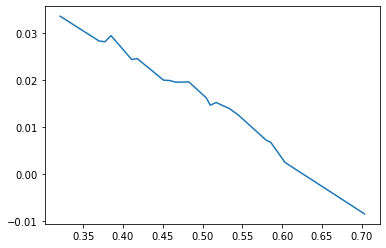

In [108]:
plt.plot(df_optimal['modularity'].values, df_optimal['silhouette_score'].values)
plt.show()

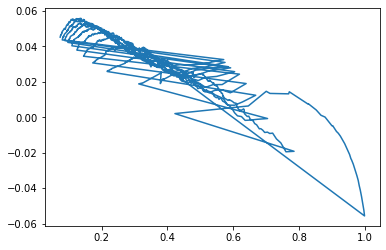

In [109]:
plt.plot(df_stats_true['modularity'].values, df_stats_true['silhouette_score'].values)
plt.show()

In [110]:
df_stats_true.loc[
    (df_stats_true['dimensionality'] == 'baseline')
    & (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set')
    & (df_stats_true['clustering'] == 'leiden_cpm') 
    & (df_stats_true['metric'] == plotting_metric) 
    & (df_stats_true['nclusters'] > 1000)
    & (df_stats_true['nclusters'] < 1300)
]

partition_type dimensionality     metric                      graph  nns  \
223             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    3   
444             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    4   
445             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    4   
665             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
666             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
667             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    5   
886             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
887             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
888             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1107            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    7   
1108            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    7   
1327            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    8   
1328            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    8   
1329            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    8   
1548            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    9   
1549            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    9   
1550            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    9   
1768            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   10   
1769            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   10   
1770            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   10   
1989            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   11   
1990            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   11   
1991            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   11   
2209            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2210            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   
2211            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
223   leiden_cpm      0.015         -0.014494    0.744053       1119   
444   leiden_cpm      0.020         -0.001806    0.635763       1054   
445   leiden_cpm      0.025          0.000320    0.624755       1202   
665   leiden_cpm      0.025          0.010584    0.569017       1024   
666   leiden_cpm      0.030          0.011622    0.556063       1161   
667   leiden_cpm      0.035          0.012570    0.544928       1287   
886   leiden_cpm      0.030          0.014300    0.513212       1048   
887   leiden_cpm      0.035          0.016862    0.503159       1163   
888   leiden_cpm      0.040          0.016088    0.492084       1284   
1107  leiden_cpm      0.035          0.020530    0.471576       1082   
1108  leiden_cpm      0.040          0.022171    0.460352       1184   
1327  leiden_cpm      0.035          0.023962    0.445720       1025   
1328  leiden_cpm      0.040          0.024467    0.436411       1115   
1329  leiden_cpm      0.045          0.024802    0.423818       1226   
1548  leiden_cpm      0.040          0.024102    0.413434       1087   
1549  leiden_cpm      0.045          0.025120    0.403284       1170   
1550  leiden_cpm      0.050          0.025865    0.395696       1268   
1768  leiden_cpm      0.040          0.026833    0.399738       1024   
1769  leiden_cpm      0.045          0.026065    0.389574       1119   
1770  leiden_cpm      0.050          0.028038    0.381218       1221   
1989  leiden_cpm      0.045          0.030562    0.374866       1089   
1990  leiden_cpm      0.050          0.028997    0.364537       1200   
1991  leiden_cpm      0.055          0.030361    0.356129       1288   
2209  leiden_cpm      0.045          0.031629    0.363581       1067   
2210  leiden_cpm 

In [111]:
df_stats_true.loc[
    (df_stats_true['num_clusters_fraction_of_genes_enriched'] == df_stats_true['num_clusters_fraction_of_genes_enriched'].max())
]

partition_type dimensionality     metric                      graph  nns  \
1765            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   10   

      clustering  parameter  silhouette_score  modularity  nclusters  \
1765  leiden_cpm      0.025          0.026838    0.442646        697   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
1765          29.162123                 27.0        14.590768   

      nenriched_clusters  mean_enriched_cluster_size  \
1765                 224                   32.928571   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
1765                          32.0                 14.512134   

      nenriched_cluster_genes                    datetime  \
1765                     7376  2024-02-05 12:20:47.992882   

      num_clusters_fraction_of_genes_enriched  
1765                                81.286234

In [112]:
df_stats_true.loc[
    (df_stats_true['nenriched_cluster_genes'] == df_stats_true['nenriched_cluster_genes'].max())
]

partition_type dimensionality     metric                      graph  nns  \
2201            EXP       baseline  manhattan  umap_fuzzy_simplicial_set   12   

      clustering  parameter  silhouette_score  modularity  nclusters  \
2201  leiden_cpm      0.005          0.032472    0.570873        144   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
2201         141.152778                138.5        70.101248   

      nenriched_clusters  mean_enriched_cluster_size  \
2201                  92                  155.619565   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
2201                         150.0                 70.265775   

      nenriched_cluster_genes                    datetime  \
2201                    14317  2024-02-05 12:20:47.992882   

      num_clusters_fraction_of_genes_enriched  
2201                                64.801929

# Upper limit of nenriched_cluster_genes: 6625 genes (32.59%)

In [113]:
df.loc[df['nenriched_clusters']==df['nenriched_clusters'].max()]

partition_type dimensionality     metric                      graph  nns  \
1013            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

      clustering  parameter  silhouette_score  modularity  nclusters  \
1013  leiden_cpm      0.665          0.044434    0.216389       7304   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
1013           2.782859                  3.0         0.965138   

      nenriched_clusters  mean_enriched_cluster_size  \
1013                 512                    3.294922   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
1013                           3.0                  1.027424   

      nenriched_cluster_genes                    datetime  \
1013                     1687  2024-02-05 12:20:47.992882   

      num_clusters_fraction_of_genes_enriched  
1013                                42.494539

In [114]:
# 8NN local maxs (sklearn NN)
df.loc[
    (df['parameter']==0.950)
    | (df['parameter']==0.755)
    | (df['parameter']==0.530)
    | (df['parameter']==0.370)
    | (df['parameter']==0.225)
    | (df['parameter']==0.115)
    | (df['parameter']==0.045)
    | (df['parameter']==0.020)
    ]

partition_type dimensionality     metric                      graph  nns  \
884             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
889             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
903             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
925             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
954             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
986             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1031            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1070            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

      clustering  parameter  silhouette_score  modularity  nclusters  \
884   leiden_cpm      0.020          0.015102    0.543357        775   
889   leiden_cpm      0.045          0.019585    0.482841       1395   
903   leiden_cpm      0.115          0.026440    0.401262       2595   
925   leiden_cpm      0.225          0.036016    0.341409       3884   
954   leiden_cpm      0.370          0.042123    0.284243       5314   
986   leiden_cpm      0.530          0.045156    0.238274       6768   
1031  leiden_cpm      0.755          0.043276    0.197987       8209   
1070  leiden_cpm      0.950          0.040270    0.177445       8797   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
884           26.227097                 25.0        12.139726   
889           14.570609                 14.0         6.591066   
903            7.832755                  7.0         3.212417   
925            5.233265                  5.0         2.103321   
954            3.824991                  4.0         1.487069   
986            3.003251                  3.0         1.143768   
1031           2.476063                  2.0         0.912118   
1070           2.310560                  2.0         0.795545   

      nenriched_clusters  mean_enriched_cluster_size  \
884                  218                   28.064220   
889                  303                   16.653465   
903                  349                    8.905444   
925                  396                    5.997475   
954                  442                    4.470588   
986                  483                    3.627329   
1031                 489                    3.102249   
1070                 474                    2.850211   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
884                           26.0                 11.903107   
889                           16.0                  7.178216   
903                            9.0                  3.424955   
925                            6.0                  2.326287   
954                            4.0                  1.629839   
986                            3.0                  1.236872   
1031                           3.0                  0.936520   
1070                           3.0                  0.814382   

      nenriched_cluster_genes                    datetime  \
884                      6118  2024-02-05 12:20:47.992882   
889                      5046  2024-02-05 12:20:47.992882   
903                      3108  2024-02-05 12:20:47.992882   
925                      2375  2024-02-05 12:20:47.992882   
954                      1976  2024-02-05 12:20:47.992882   
986                      1752  2024-02-05 12:20:47.992882   
1031                     1517  2024-02-05 12:20:47.992882   
1070                     1351  2024-02-05 12:20:47.992882   

      num_clusters_fraction_of_genes_enriched  
884                                 65.616649  
889                                 75.220801  
903                                 53.364755  
925                                 46.270786  
954                                 42.969202  
986                                 41.632195  
1031                                36.495769  
1070                    

In [115]:
# 10NN local maxs (sklearn NN)
df.loc[
    (df['parameter']==0.1)
    ]

partition_type dimensionality     metric                      graph  nns  \
900            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

     clustering  parameter  silhouette_score  modularity  nclusters  \
900  leiden_cpm        0.1          0.023702     0.41448       2377   

     mean_cluster_size  median_cluster_size  sd_cluster_size  \
900           8.551115                  8.0          3.63316   

     nenriched_clusters  mean_enriched_cluster_size  \
900                 355                    9.684507   

     median_enriched_cluster_size  sd_enriched_cluster_size  \
900                           9.0                  3.955622   

     nenriched_cluster_genes                    datetime  \
900                     3438  2024-02-05 12:20:47.992882   

     num_clusters_fraction_of_genes_enriched  
900                                60.045754

In [116]:
# 2NN local maxs
df.loc[
    (df['parameter']==0.280)
    ]

partition_type dimensionality     metric                      graph  nns  \
936            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

     clustering  parameter  silhouette_score  modularity  nclusters  \
936  leiden_cpm       0.28          0.038557    0.316754       4451   

     mean_cluster_size  median_cluster_size  sd_cluster_size  \
936           4.566614                  4.0         1.790976   

     nenriched_clusters  mean_enriched_cluster_size  \
936                 414                    5.275362   

     median_enriched_cluster_size  sd_enriched_cluster_size  \
936                           5.0                  2.008802   

     nenriched_cluster_genes                    datetime  \
936                     2184  2024-02-05 12:20:47.992882   

     num_clusters_fraction_of_genes_enriched  
936                                44.483715

In [117]:
# 3NN local maxs
df.loc[
    (df['parameter']==0.900)
    | (df['parameter']==0.605)
    | (df['parameter']==0.536)
    | (df['parameter']==0.485)
    | (df['parameter']==0.340)
    | (df['parameter']==0.075)
    ]

partition_type dimensionality     metric                      graph  nns  \
895             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
948             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
977             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1001            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1060            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

      clustering  parameter  silhouette_score  modularity  nclusters  \
895   leiden_cpm      0.075          0.021356    0.438188       1977   
948   leiden_cpm      0.340          0.041676    0.292821       5126   
977   leiden_cpm      0.485          0.044627    0.252862       6135   
1001  leiden_cpm      0.605          0.045050    0.225736       7067   
1060  leiden_cpm      0.900          0.041233    0.182216       8648   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
895           10.281234                 10.0         4.296170   
948            3.965275                  4.0         1.585009   
977            3.313121                  3.0         1.196129   
1001           2.876185                  3.0         1.035978   
1060           2.350370                  2.0         0.820667   

      nenriched_clusters  mean_enriched_cluster_size  \
895                  343                   11.469388   
948                  434                    4.589862   
977                  467                    3.852248   
1001                 487                    3.418891   
1060                 475                    2.913684   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
895                           11.0                  4.375731   
948                            4.0                  1.738024   
977                            4.0                  1.294698   
1001                           3.0                  1.089945   
1060                           3.0                  0.840377   

      nenriched_cluster_genes                    datetime  \
895                      3934  2024-02-05 12:20:47.992882   
948                      1992  2024-02-05 12:20:47.992882   
977                      1799  2024-02-05 12:20:47.992882   
1001                     1665  2024-02-05 12:20:47.992882   
1060                     1384  2024-02-05 12:20:47.992882   

      num_clusters_fraction_of_genes_enriched  
895                                 66.386008  
948                                 42.533110  
977                                 41.332923  
1001                                39.892502  
1060                                32.342812

In [118]:
# 5NN local maxs
df.loc[
    (df['parameter']==0.935)
    | (df['parameter']==0.795)
    | (df['parameter']==0.640)
    | (df['parameter']==0.465)
    | (df['parameter']==0.350)
    | (df['parameter']==0.295)
    | (df['parameter']==0.190)
    | (df['parameter']==0.125)
    | (df['parameter']==0.0499999999999999)
    | (df['parameter']==0.0349999999999999)
    ]

partition_type dimensionality     metric                      graph  nns  \
887             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
890             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
905             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
918             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
939             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
950             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
973             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1008            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1039            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1067            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

      clustering  parameter  silhouette_score  modularity  nclusters  \
887   leiden_cpm      0.035          0.016862    0.503159       1163   
890   leiden_cpm      0.050          0.020895    0.474408       1494   
905   leiden_cpm      0.125          0.027493    0.394822       2725   
918   leiden_cpm      0.190          0.033633    0.353904       3521   
939   leiden_cpm      0.295          0.038110    0.310107       4608   
950   leiden_cpm      0.350          0.041539    0.289192       5199   
973   leiden_cpm      0.465          0.044207    0.257231       6025   
1008  leiden_cpm      0.640          0.044952    0.220637       7201   
1039  leiden_cpm      0.795          0.043507    0.192925       8350   
1067  leiden_cpm      0.935          0.040299    0.178234       8777   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
887           17.477214                 16.0         7.864182   
890           13.605087                 13.0         5.959648   
905            7.459083                  7.0         3.042011   
918            5.772792                  6.0         2.272805   
939            4.411024                  4.0         1.723983   
950            3.909598                  4.0         1.538973   
973            3.373610                  3.0         1.232748   
1008           2.822664                  3.0         1.002049   
1039           2.434251                  2.0         0.879943   
1067           2.315825                  2.0         0.801370   

      nenriched_clusters  mean_enriched_cluster_size  \
887                  280                   19.521429   
890                  300                   15.573333   
905                  343                    8.478134   
918                  401                    6.533666   
939                  432                    5.039352   
950                  441                    4.507937   
973                  466                    3.957082   
1008                 500                    3.364000   
1039                 494                    3.044534   
1067                 477                    2.861635   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
887                           19.0                  8.034717   
890                           15.0                  6.184763   
905                            8.0                  3.373532   
918                            6.0                  2.542308   
939                            5.0                  1.842358   
950                            4.0                  1.672929   
973                            4.0                  1.356230   
1008                           3.0                  1.059955   
1039                           3.0                  0.929738   
1067                           3.0                  0.820170   

      nenriched_cluster_genes                    datetime  \
887                      5466  2024-02-05 12:20:47.992882   
890                      4672  2024-02-05 12:20:47.992882   
905                      2908  2024-02-05 12:20:47.992882   
918                      2620  2024-02

In [119]:
# 6NN local maxs
df.loc[
    (df['parameter']==0.800)
    | (df['parameter']==0.665)
    | (df['parameter']==0.435)
    | (df['parameter']==0.045)
    ]

partition_type dimensionality     metric                      graph  nns  \
889             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
967             EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1013            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   
1040            EXP       baseline  manhattan  umap_fuzzy_simplicial_set    6   

      clustering  parameter  silhouette_score  modularity  nclusters  \
889   leiden_cpm      0.045          0.019585    0.482841       1395   
967   leiden_cpm      0.435          0.043588    0.264317       5822   
1013  leiden_cpm      0.665          0.044434    0.216389       7304   
1040  leiden_cpm      0.800          0.043256    0.192148       8372   

      mean_cluster_size  median_cluster_size  sd_cluster_size  \
889           14.570609                 14.0         6.591066   
967            3.491240                  3.0         1.293501   
1013           2.782859                  3.0         0.965138   
1040           2.427855                  2.0         0.875519   

      nenriched_clusters  mean_enriched_cluster_size  \
889                  303                   16.653465   
967                  471                    4.050955   
1013                 512                    3.294922   
1040                 497                    3.042254   

      median_enriched_cluster_size  sd_enriched_cluster_size  \
889                           16.0                  7.178216   
967                            4.0                  1.401226   
1013                           3.0                  1.027424   
1040                           3.0                  0.917209   

      nenriched_cluster_genes                    datetime  \
889                      5046  2024-02-05 12:20:47.992882   
967                      1908  2024-02-05 12:20:47.992882   
1013                     1687  2024-02-05 12:20:47.992882   
1040                     1512  2024-02-05 12:20:47.992882   

      num_clusters_fraction_of_genes_enriched  
889                                 75.220801  
967                                 44.212732  
1013                                42.494539  
1040                                36.970580

In [120]:
y = 'nenriched_clusters'
# y = 'num_clusters_fraction_of_genes_enriched'

# x = 'silhouette_score'
x = 'modularity'

labels = 'parameter'
# labels = 'nns'

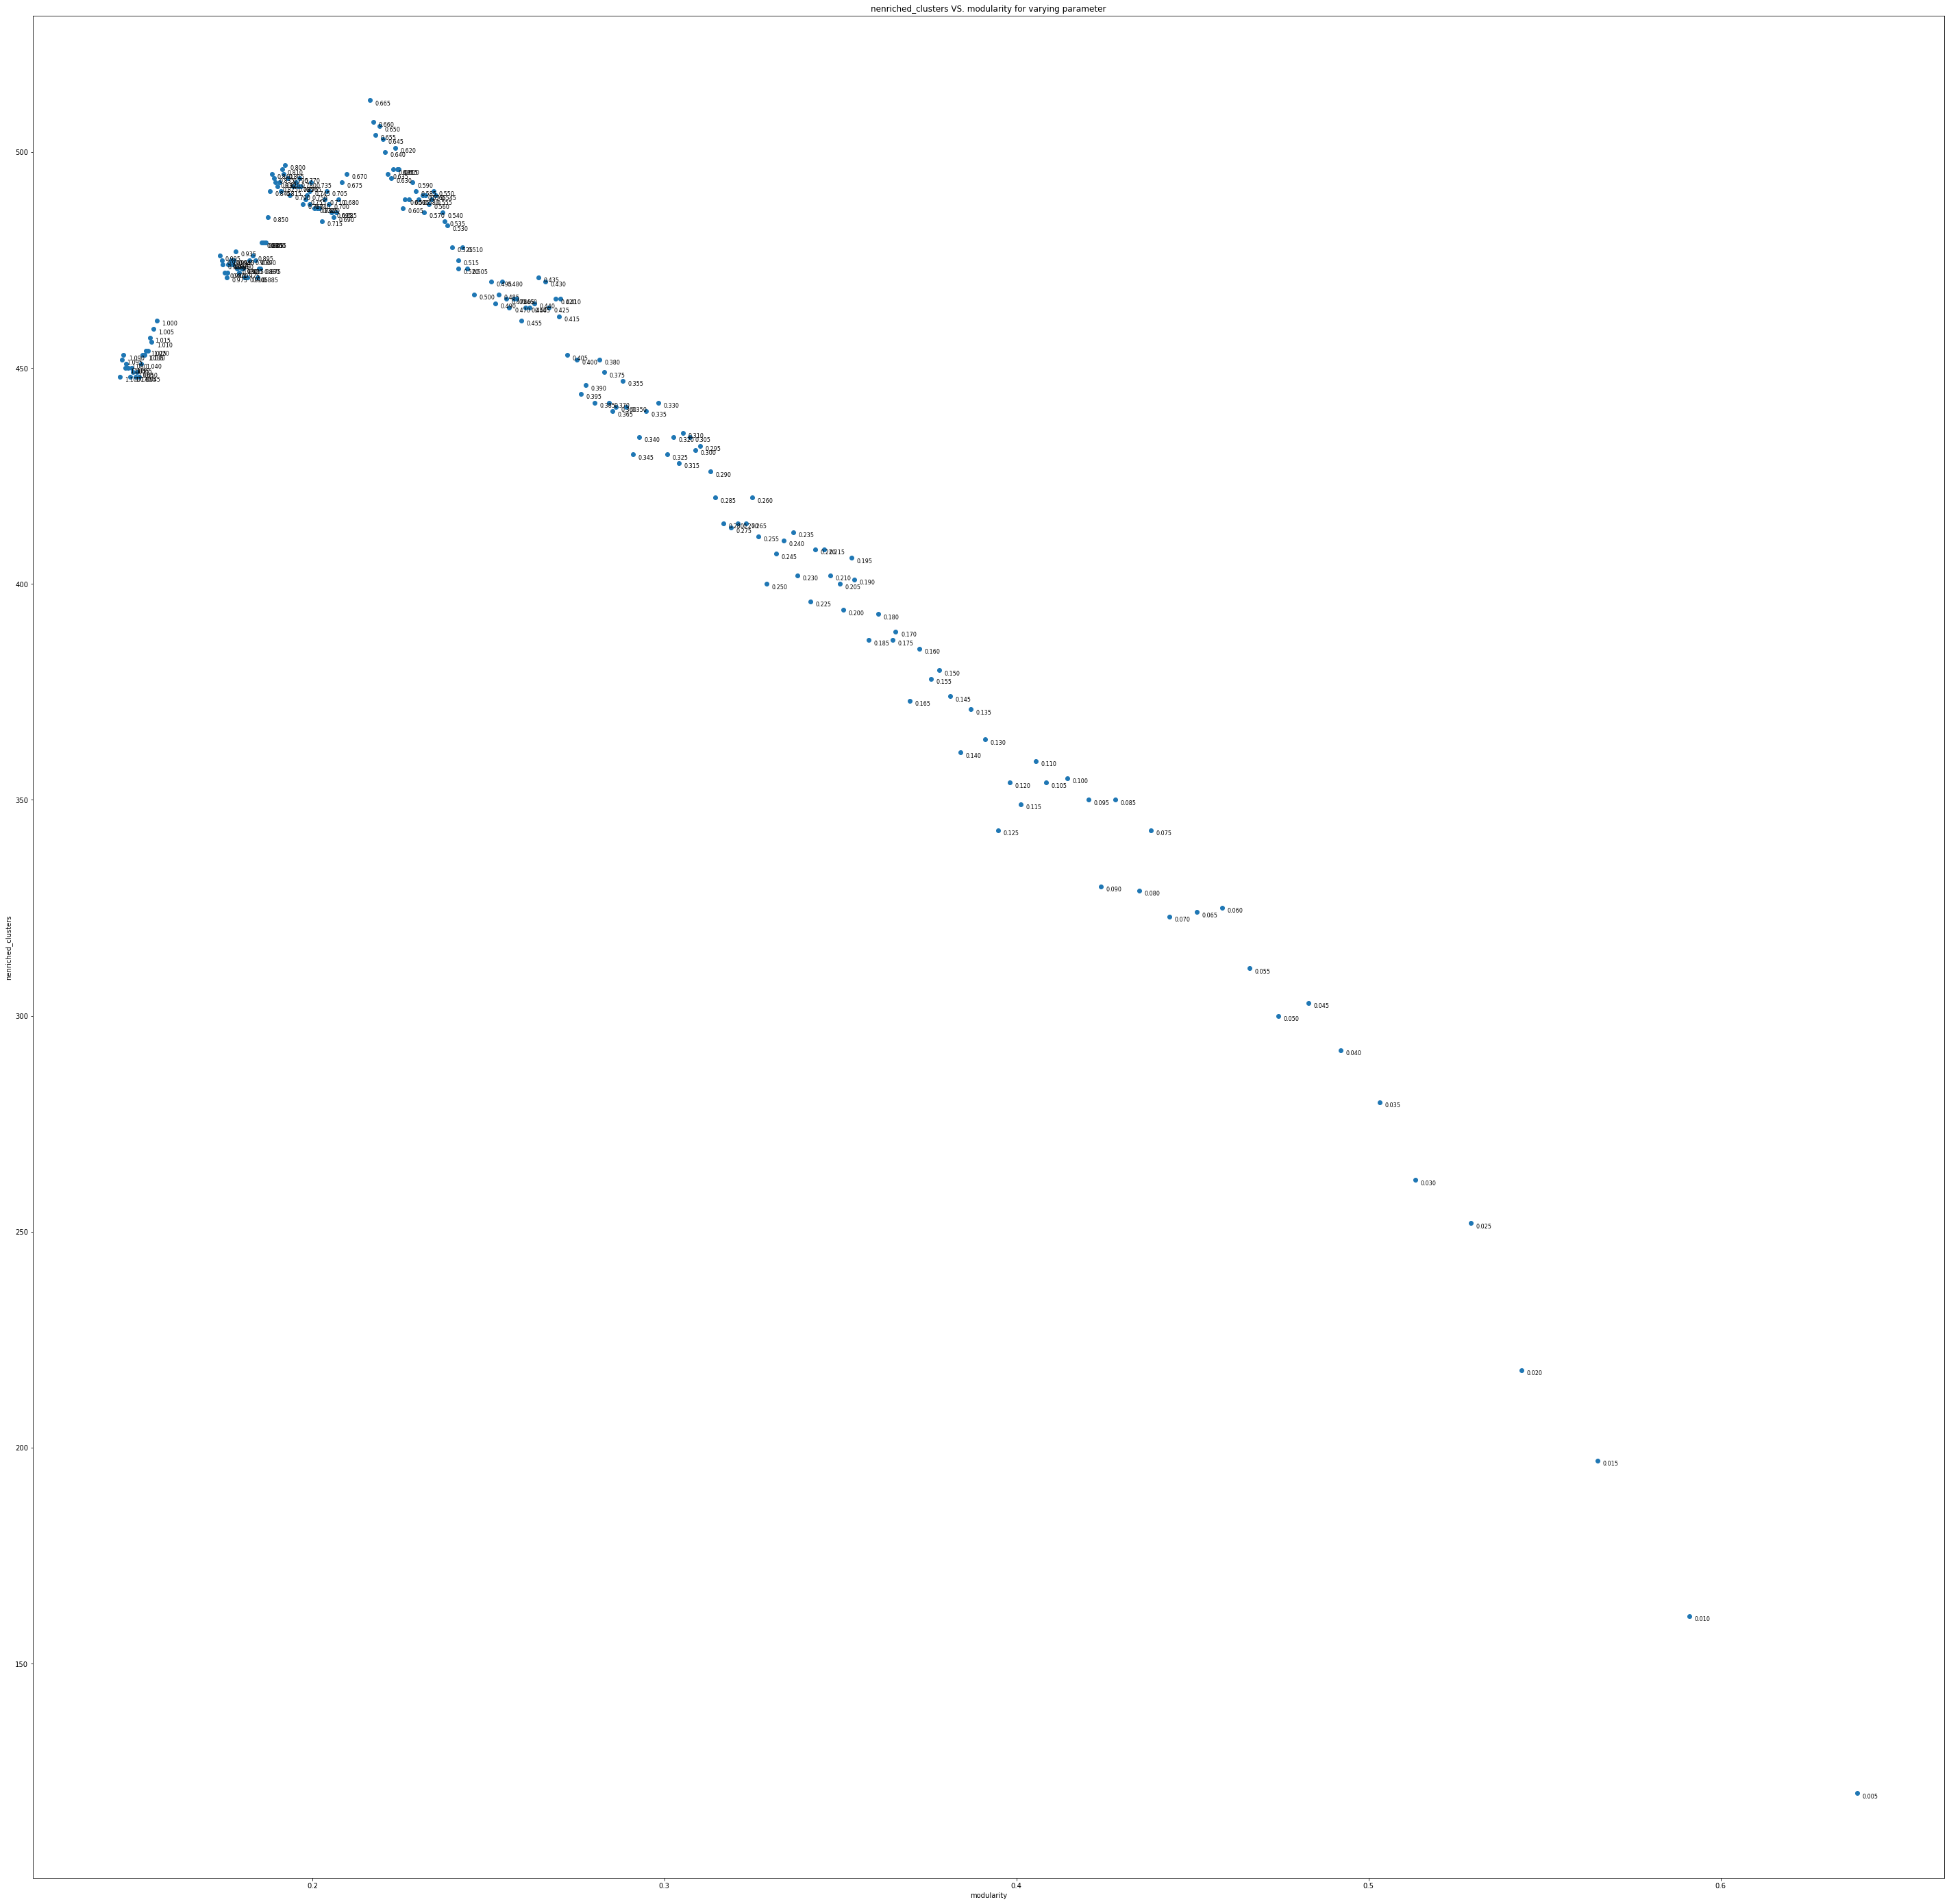

In [121]:
x_in = 50
y_in = 50
# x_in = 15
# y_in = 10
plt.figure(figsize=(x_in, y_in))

# Create scatter plot
plt.scatter(df[x].values, df[y].values)

label_adj_x = (0
            + (df[x].max() - df[x].min()) * 0.0075
            # + x_in/6.4
                )
label_adj_y = (0 
            # + (y_in/4.8)
               )

# Label each point with the number of nearest neighbors below the point
for i, txt in enumerate(df[labels].values):
    plt.text(df[x].values[i] + label_adj_x, df[y].values[i] + label_adj_y, 
            str("{:.3f}".format(
                txt
                ))
                ,
            fontsize=8, ha='center', va='top', color='black')

# Set axis labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{y} VS. {x} for varying {labels}')

# Display the plot
plt.show()

In [122]:
df_stats_true['parameter'].unique()

array([0.6  , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 ,

# NN CURVES FOR VARYING RP PLOTTING PARAMETERS

In [123]:
plot_ps = sorted(df_stats_true['parameter'].unique())

if plotting_metric == 'manhattan':
    plot_ps = []

    for p_idx in np.arange(19, len(df_stats_true['parameter'].unique()), 20):
        plot_ps.append(sorted(df_stats_true['parameter'].unique())[p_idx])

In [124]:
import distinctipy

num_colors = len(df_stats_true['parameter'].unique())

colors = distinctipy.get_colors(num_colors)

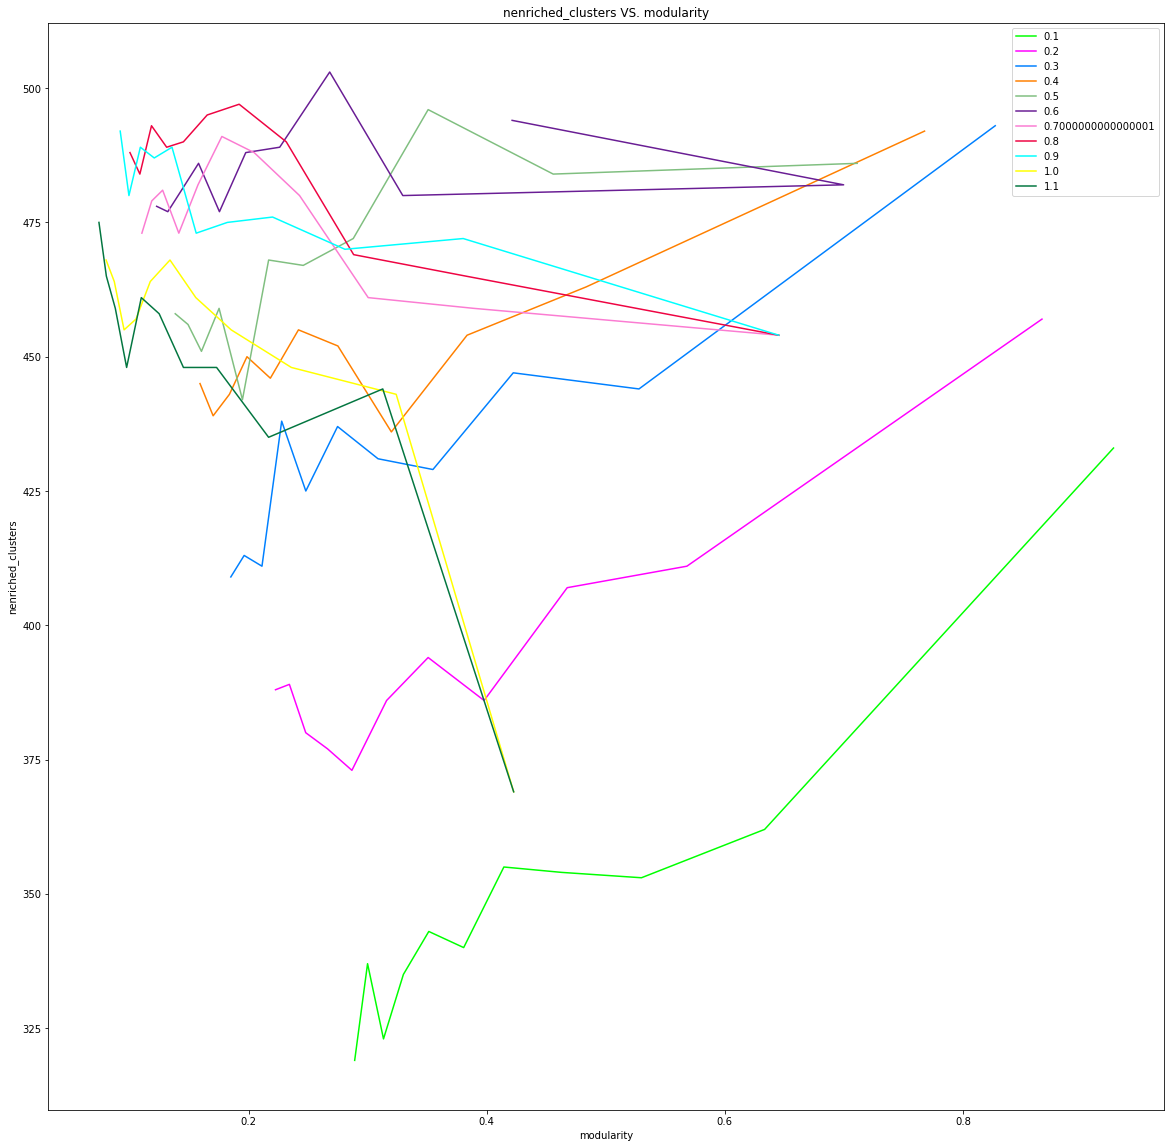

In [125]:
plt.figure(figsize=(20, 20))

for idx, p in enumerate(plot_ps):
    df = df_stats_true.loc[
        # (df_stats_true['nns'] == 6) & 
        (df_stats_true['parameter'] == p) & 

        (df_stats_true['dimensionality'] == 'baseline') &
        (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
        (df_stats_true['clustering'] == 'leiden_cpm') &
        (df_stats_true['metric'] == plotting_metric) &
        (df_stats_true['nclusters'] > 50)
    ]

    y = 'nenriched_clusters'
    # y = 'num_clusters_fraction_of_genes_enriched'

    # x = 'silhouette_score'
    x = 'modularity'

    plt.plot(df[x].values, df[y].values, label=str(p), color=colors[idx])

# Set axis labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{y} VS. {x}')

# Display the plot
plt.legend()
plt.show()

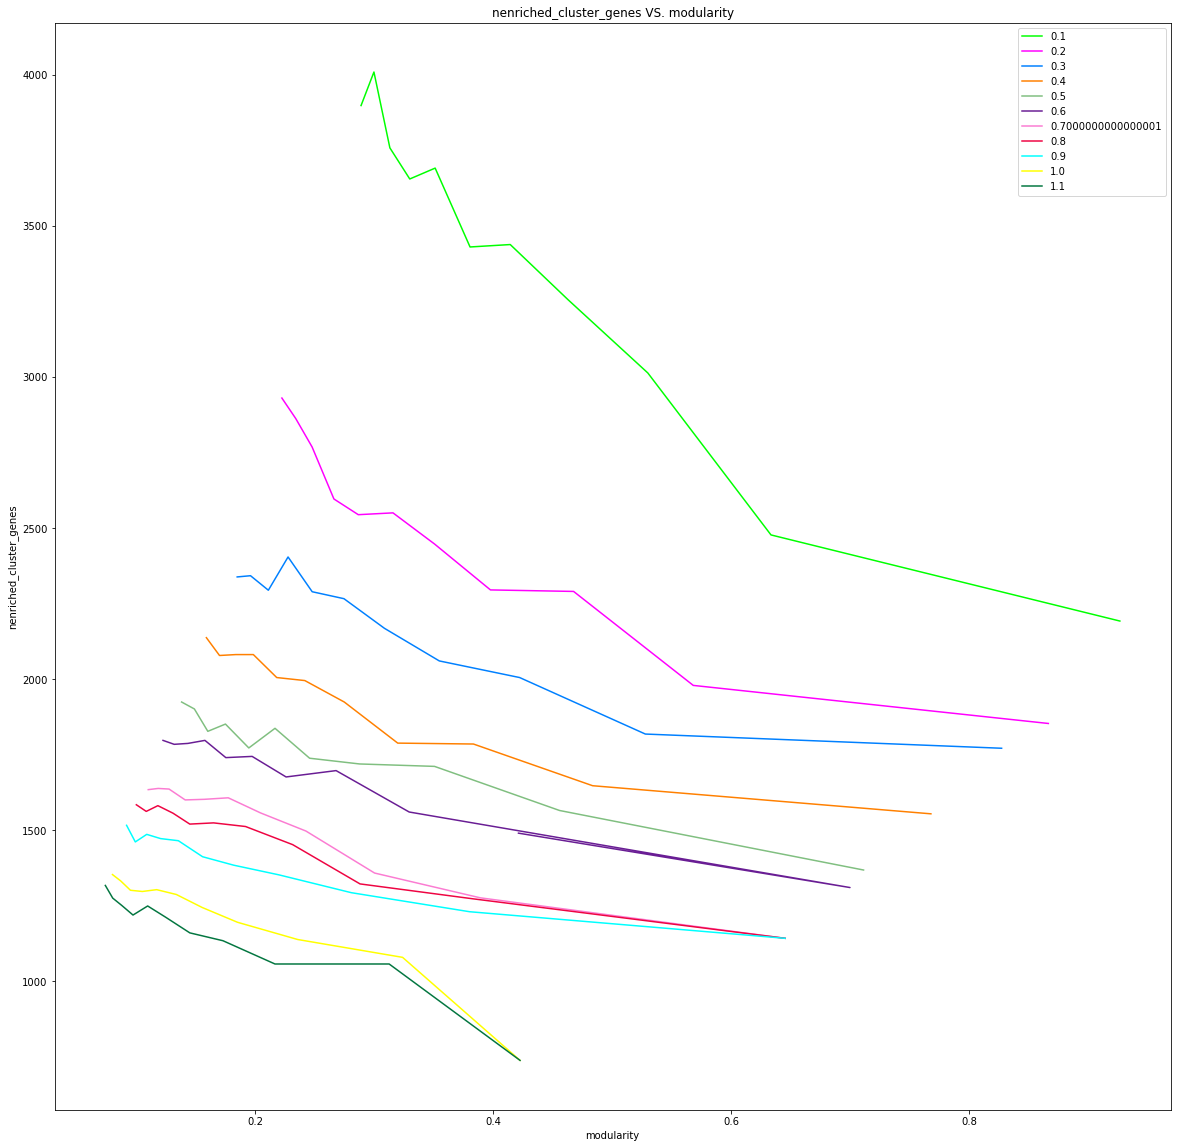

In [126]:
plt.figure(figsize=(20, 20))

for idx, p in enumerate(plot_ps):
    df = df_stats_true.loc[
        # (df_stats_true['nns'] == 6) & 
        (df_stats_true['parameter'] == p) & 

        (df_stats_true['dimensionality'] == 'baseline') &
        (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
        (df_stats_true['clustering'] == 'leiden_cpm') &
        (df_stats_true['metric'] == plotting_metric) &
        (df_stats_true['nclusters'] > 50)
    ]

    y = 'nenriched_cluster_genes'
    # y = 'num_clusters_fraction_of_genes_enriched'

    # x = 'silhouette_score'
    x = 'modularity'

    plt.plot(df[x].values, df[y].values, label=str(p), color=colors[idx])

# Set axis labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{y} VS. {x}')

# Display the plot
plt.legend()
plt.show()

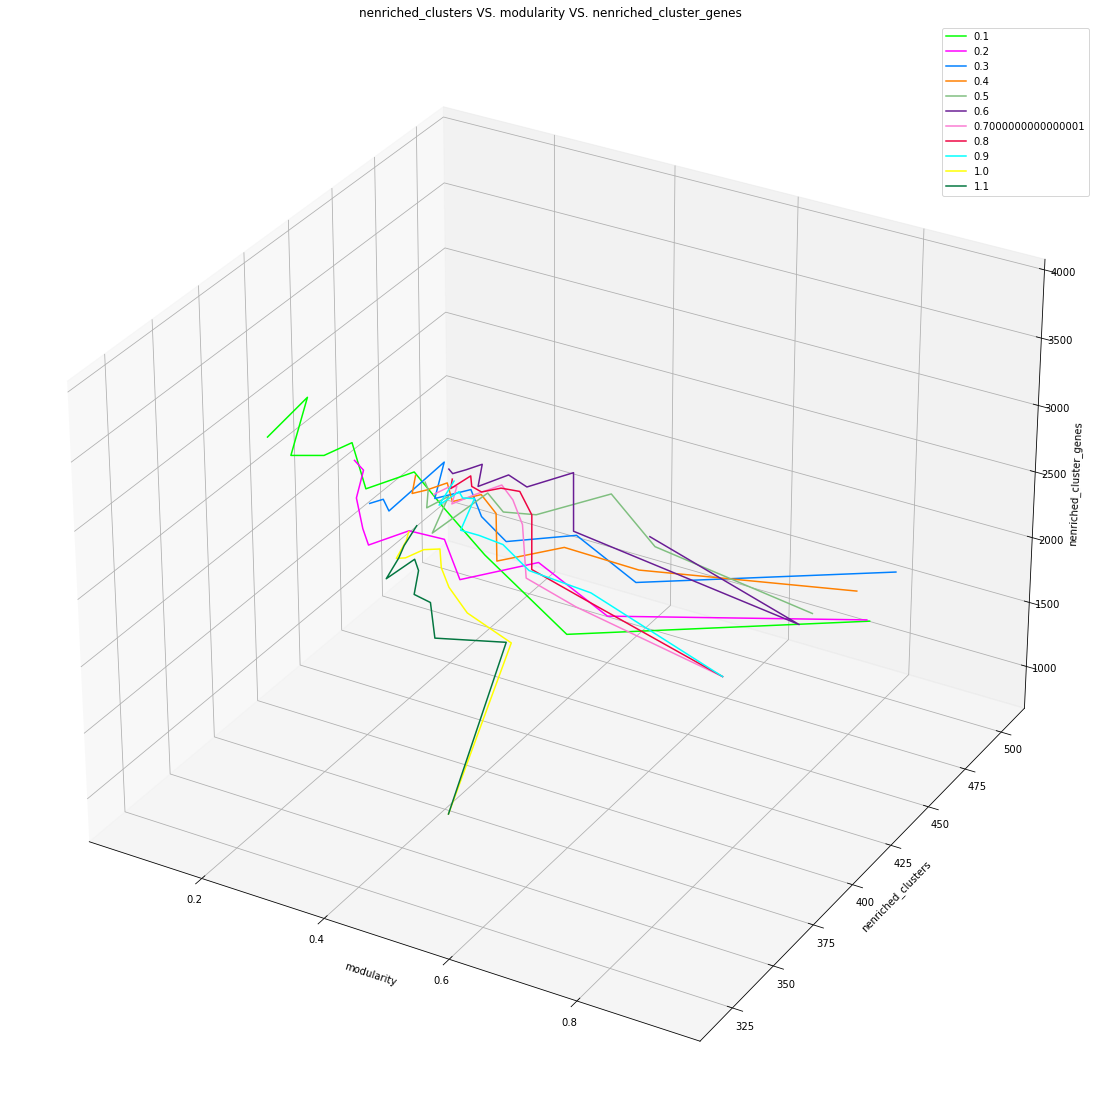

In [127]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

for idx, p in enumerate(plot_ps):
    df = df_stats_true.loc[
        # (df_stats_true['nns'] == 6) & 
        (df_stats_true['parameter'] == p) & 
        (df_stats_true['dimensionality'] == 'baseline') &
        (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
        (df_stats_true['clustering'] == 'leiden_cpm') &
        (df_stats_true['metric'] == plotting_metric) &
        (df_stats_true['nclusters'] > 50)
    ]

    y = 'nenriched_clusters'
    x = 'modularity'
    z = 'nenriched_cluster_genes'

    ax.plot(df[x].values, df[y].values, df[z].values, label=str(p), color=colors[idx])

# Set axis labels and title
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.title(f'{y} VS. {x} VS. {z}')

# Display the plot
plt.legend()
plt.show()

# NN SCATTER FOR VARYING RP PLOTTING PARAMETERS

0.005


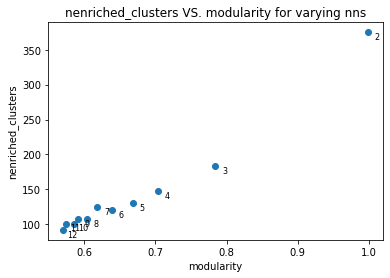

0.01


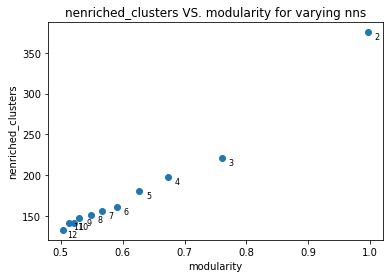

0.015


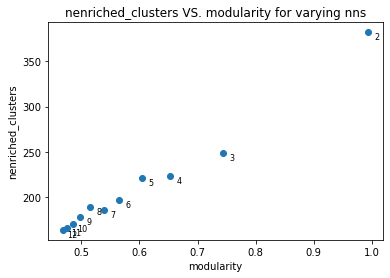

0.02


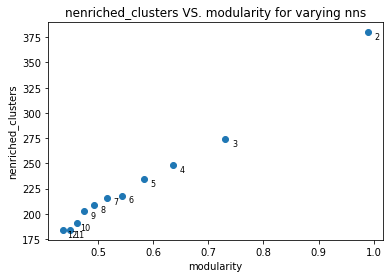

0.025


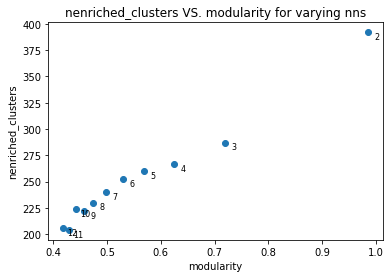

0.03


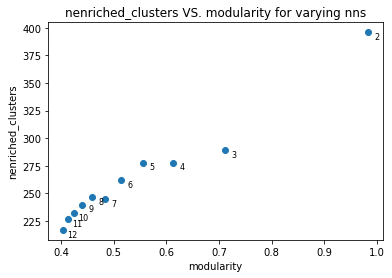

0.0349999999999999


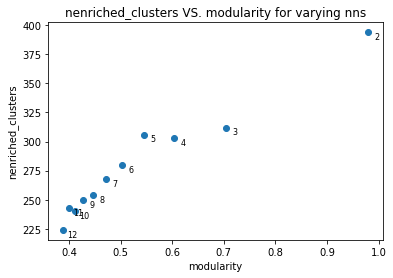

0.04


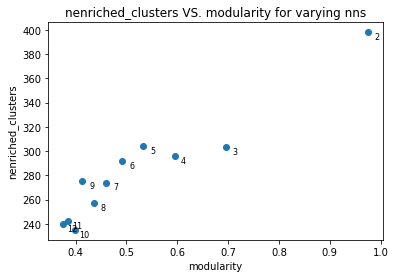

0.045


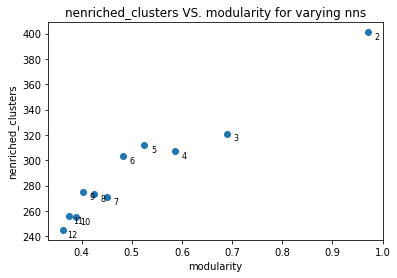

0.0499999999999999


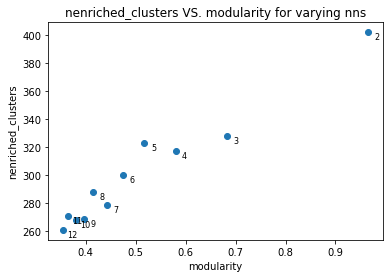

0.055


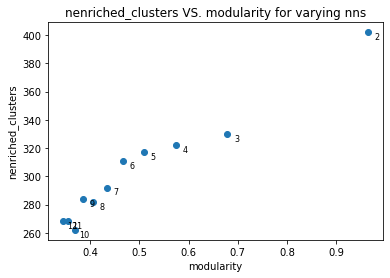

0.06


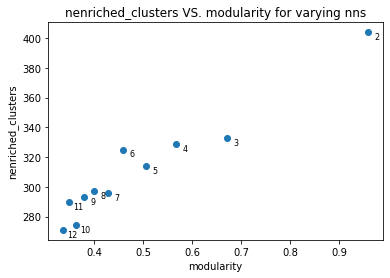

0.065


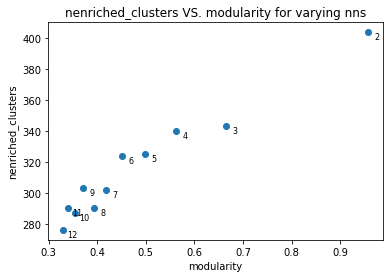

0.07


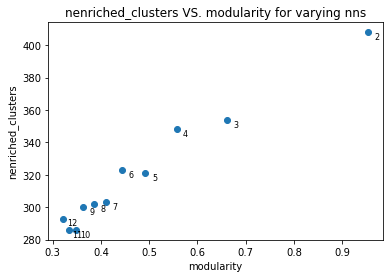

0.075


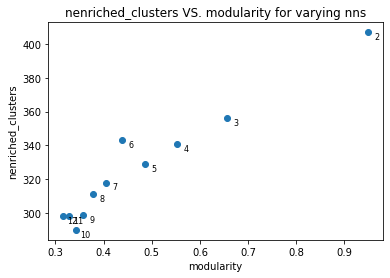

0.08


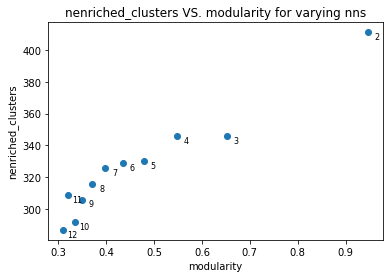

0.085


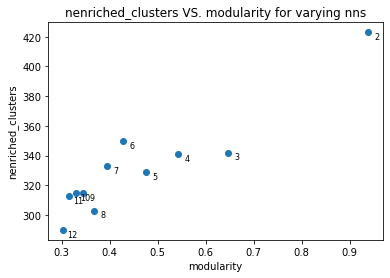

0.09


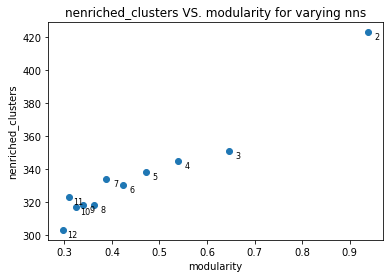

0.095


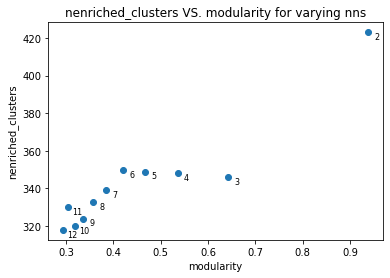

0.1


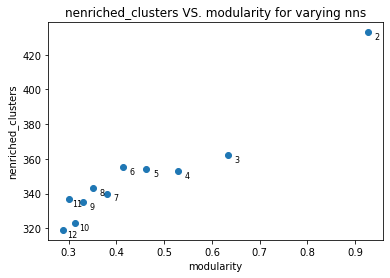

0.105


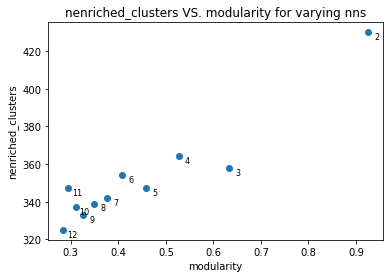

0.11


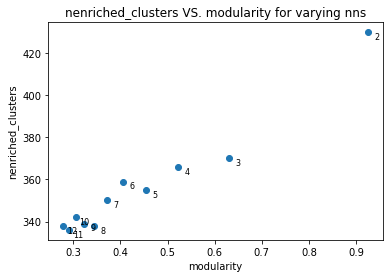

0.115


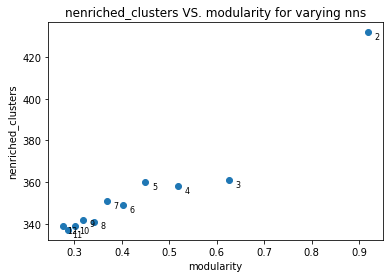

0.12


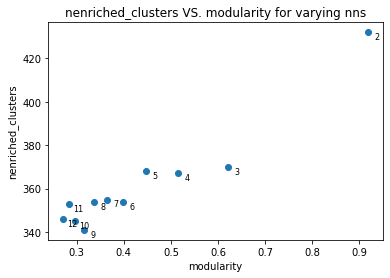

0.125


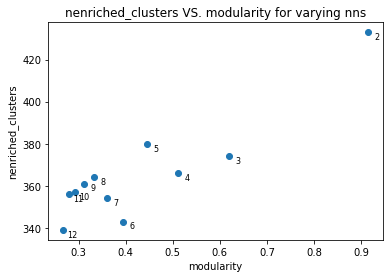

0.13


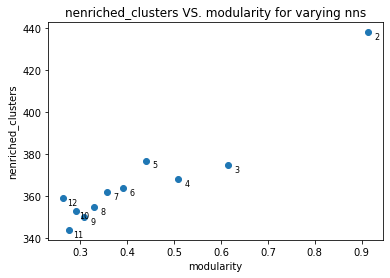

0.135


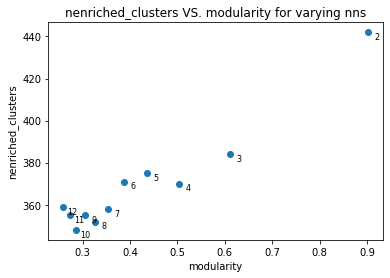

0.14


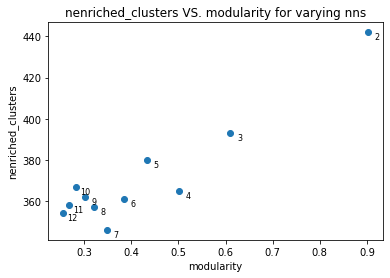

0.145


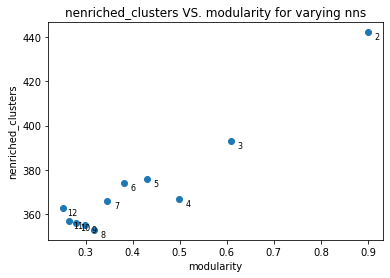

0.15


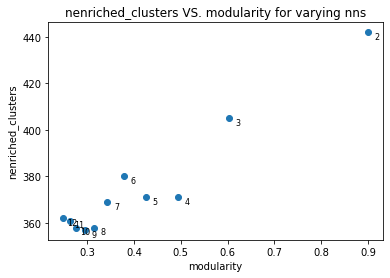

0.155


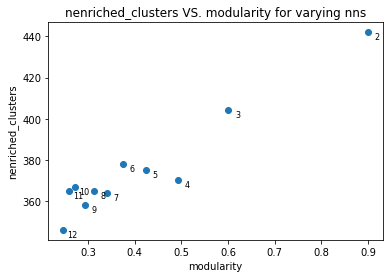

0.16


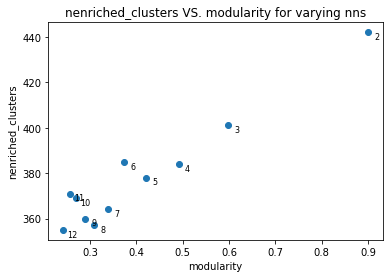

0.165


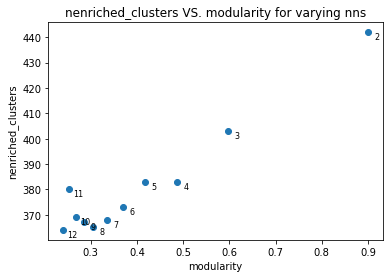

0.17


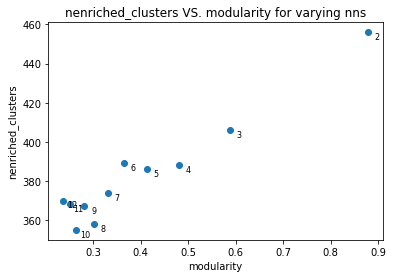

0.175


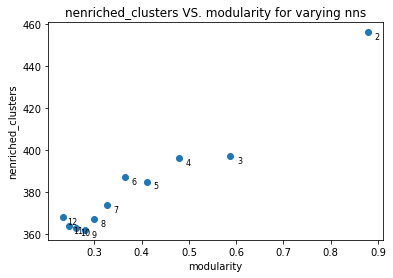

0.18


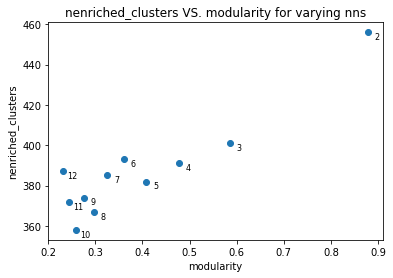

0.185


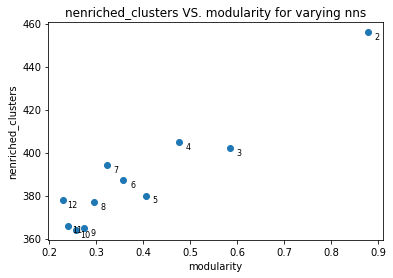

0.19


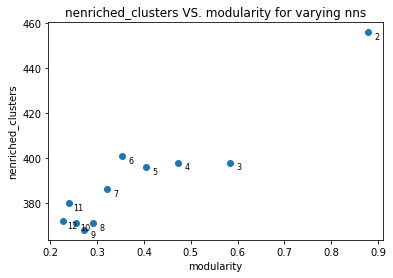

0.195


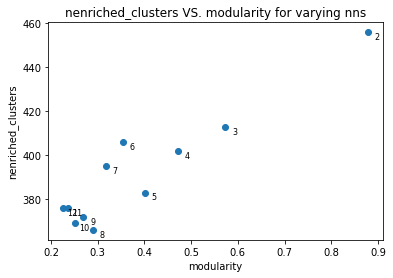

0.2


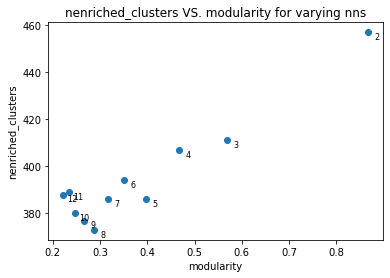

0.205


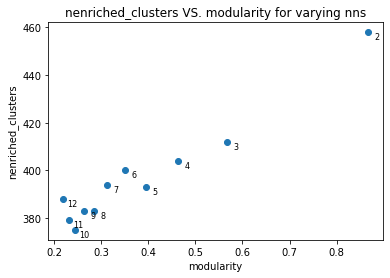

0.21


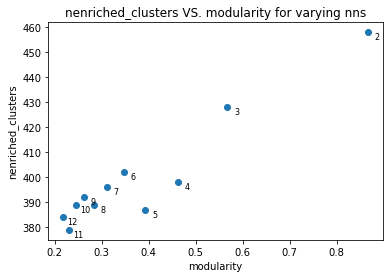

0.215


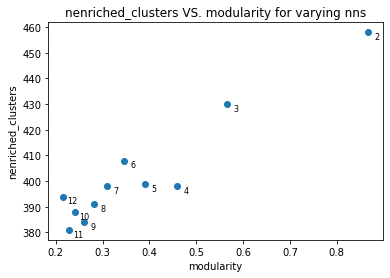

0.22


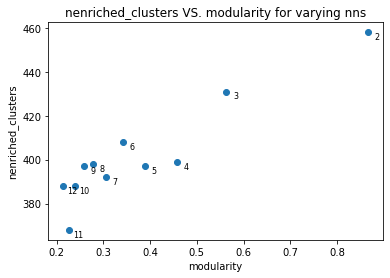

0.225


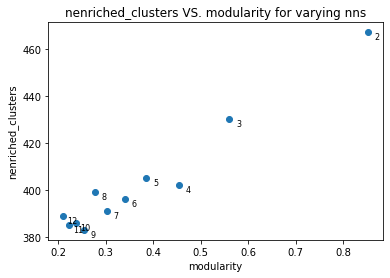

0.23


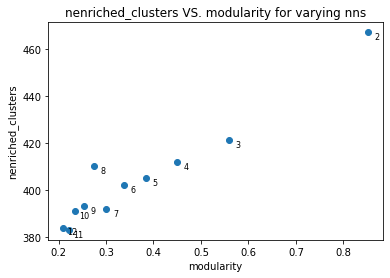

0.235


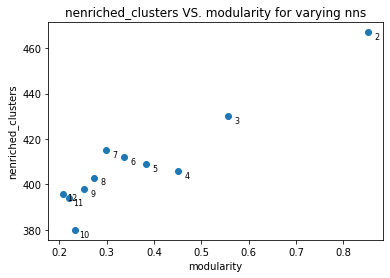

0.24


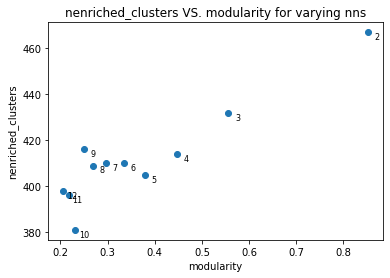

0.245


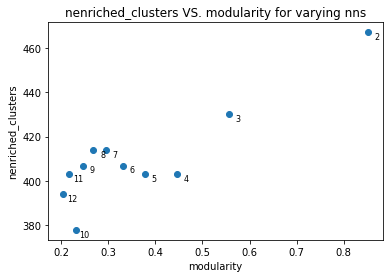

0.25


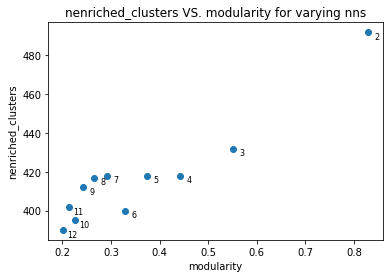

0.255


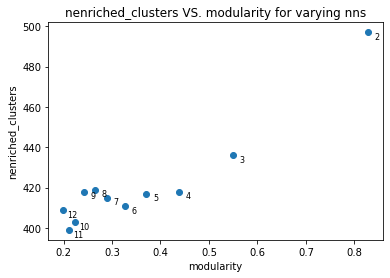

0.26


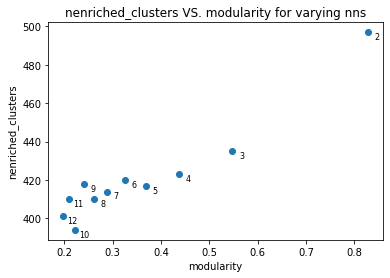

0.265


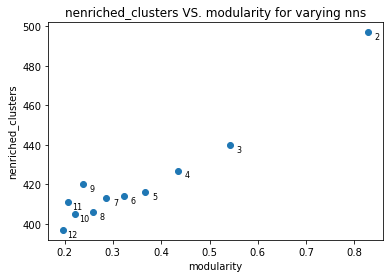

0.27


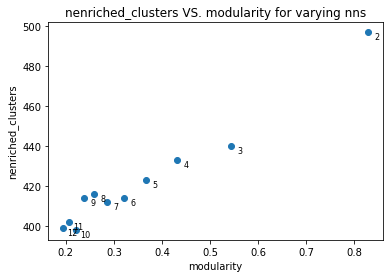

0.275


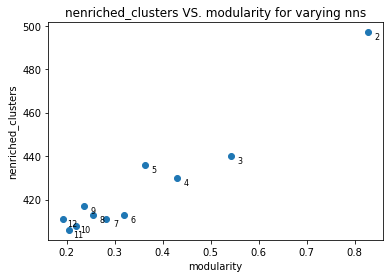

0.28


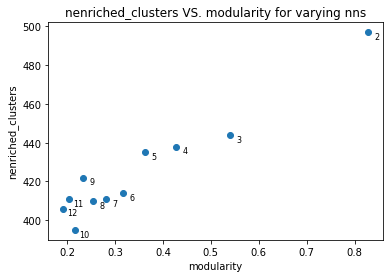

0.285


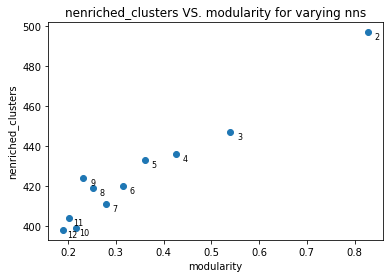

0.29


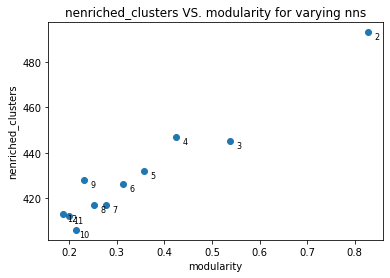

0.295


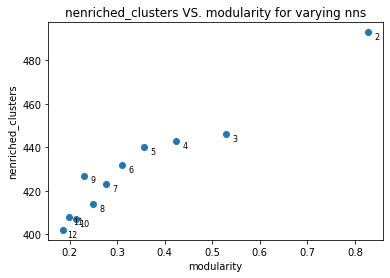

0.3


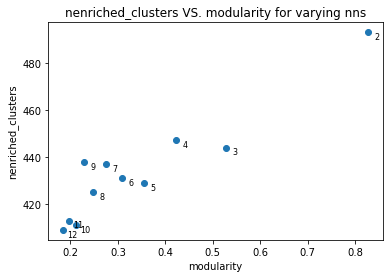

0.305


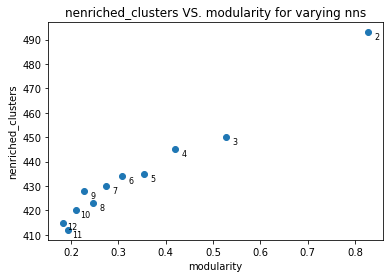

0.31


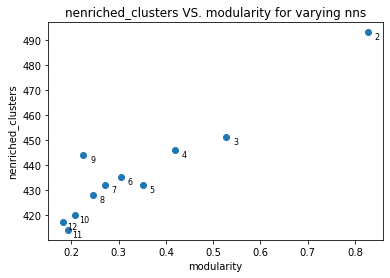

0.315


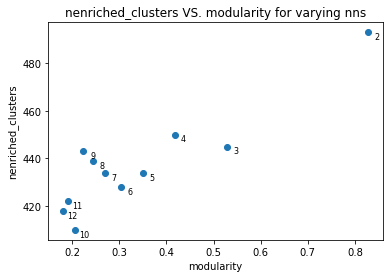

0.32


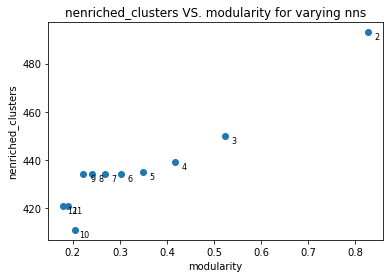

0.325


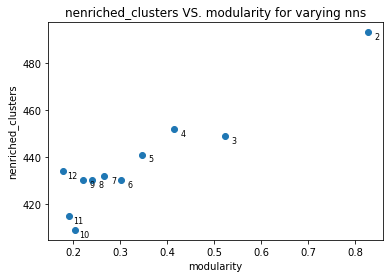

0.33


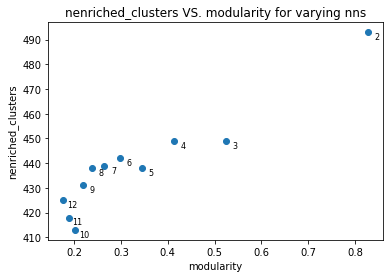

0.335


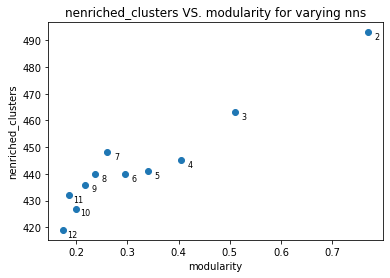

0.34


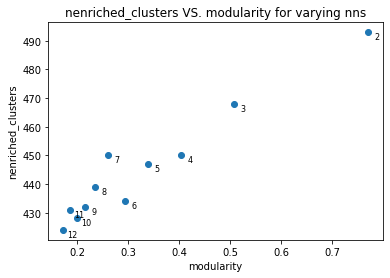

0.345


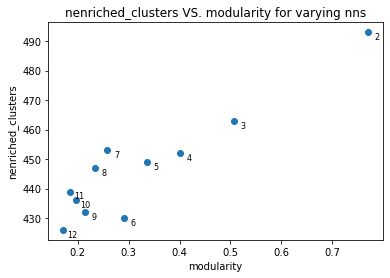

0.35


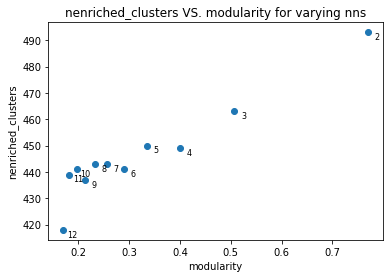

0.355


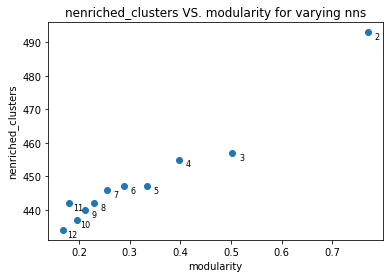

0.36


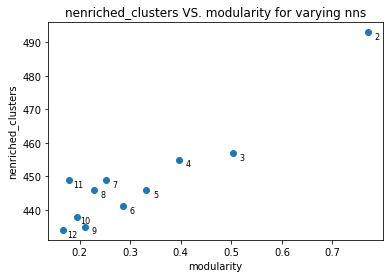

0.365


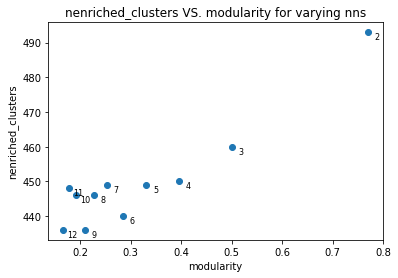

0.37


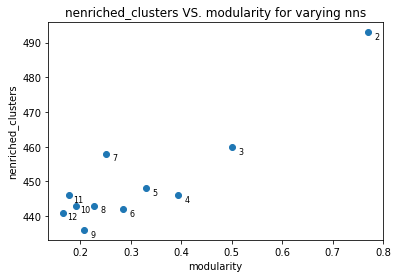

0.375


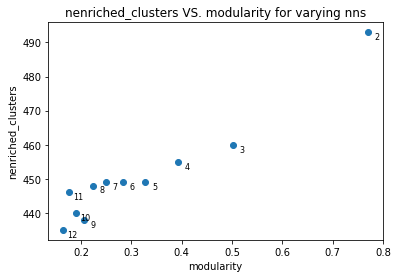

0.38


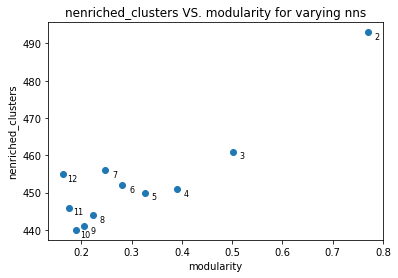

0.385


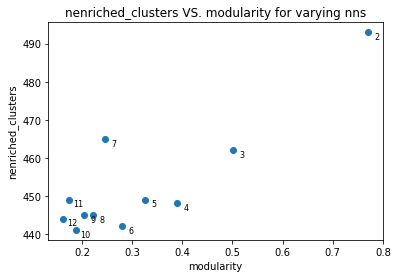

0.39


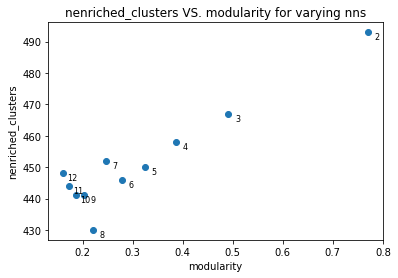

0.395


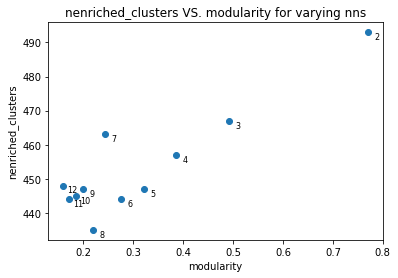

0.4


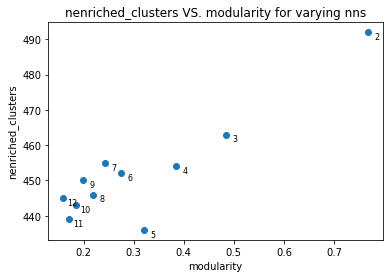

0.405


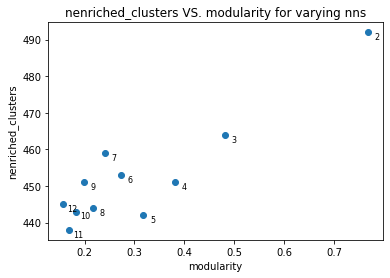

0.41


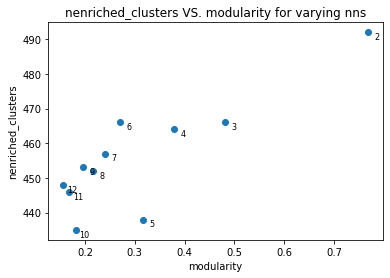

0.415


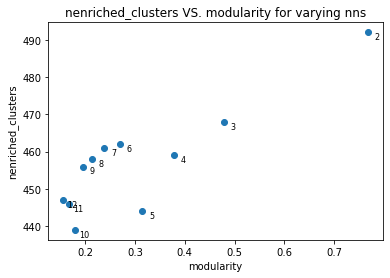

0.42


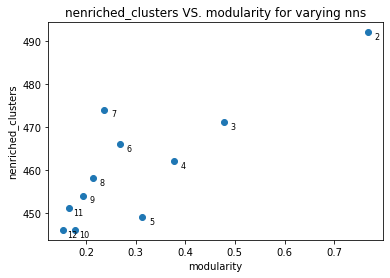

0.425


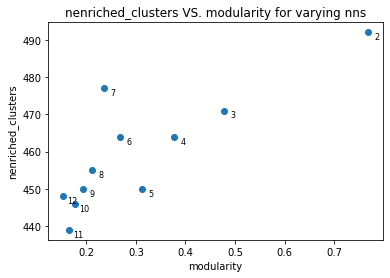

0.43


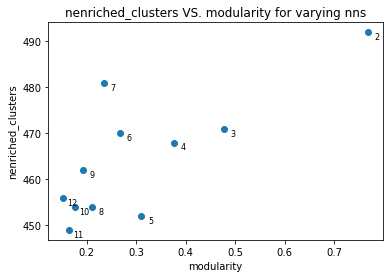

0.435


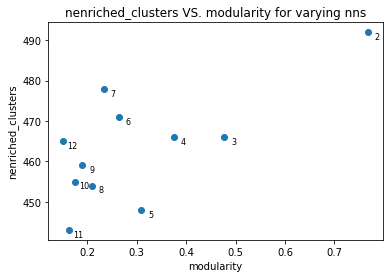

0.44


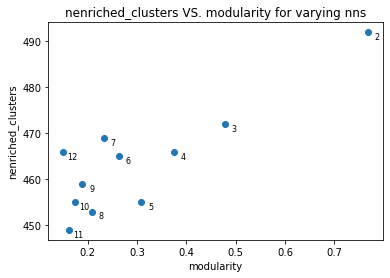

0.445


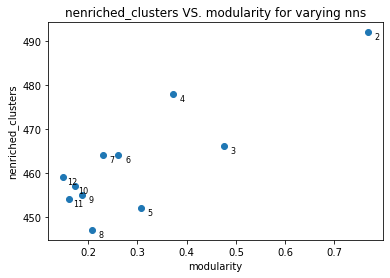

0.45


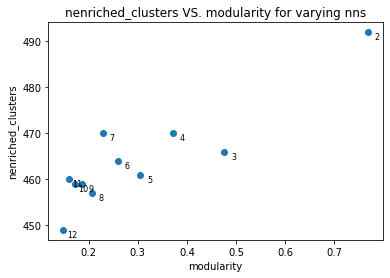

0.455


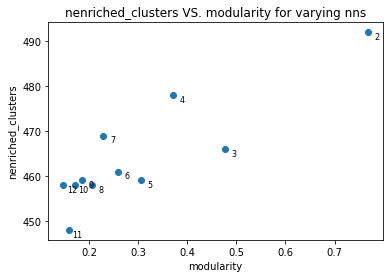

0.46


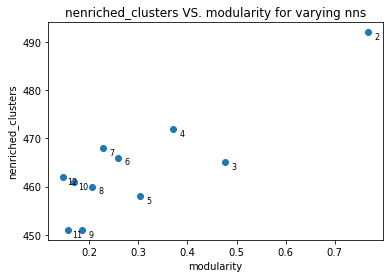

0.465


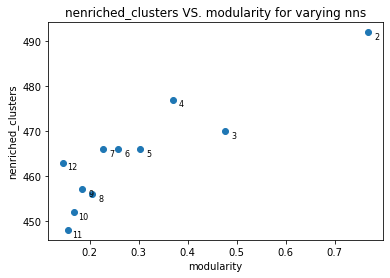

0.47


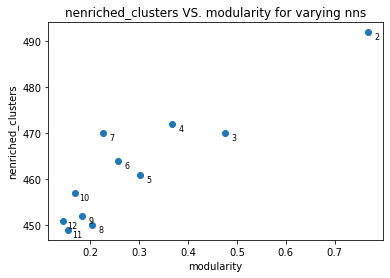

0.475


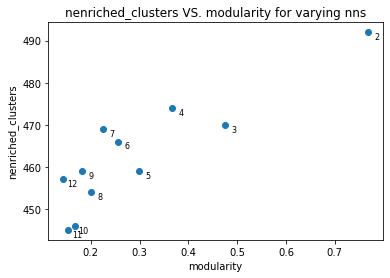

0.48


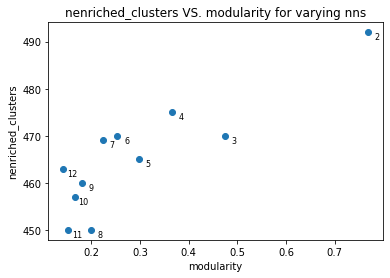

0.485


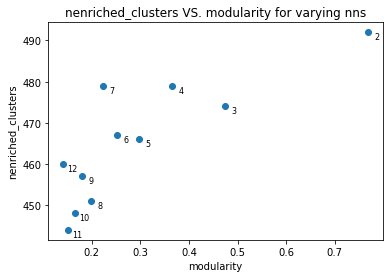

0.49


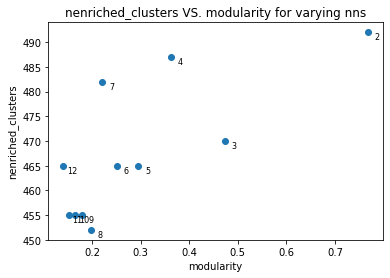

0.495


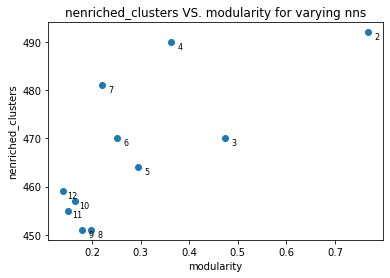

0.5


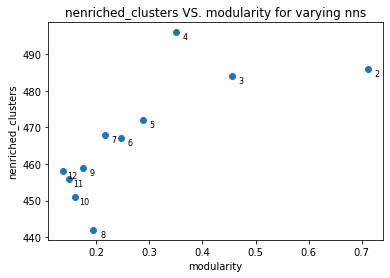

0.505


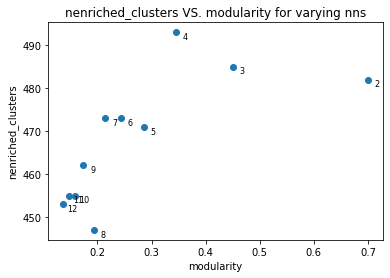

0.51


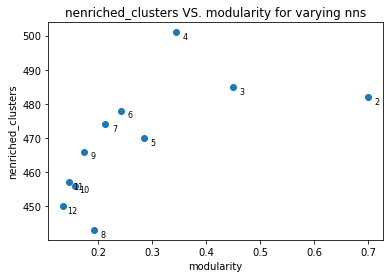

0.515


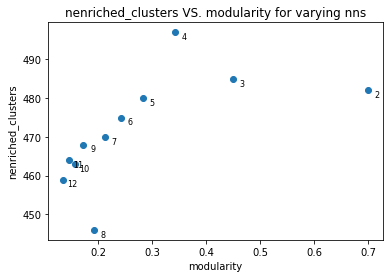

0.52


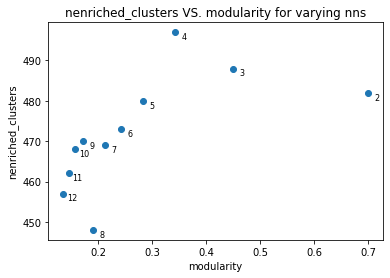

0.525


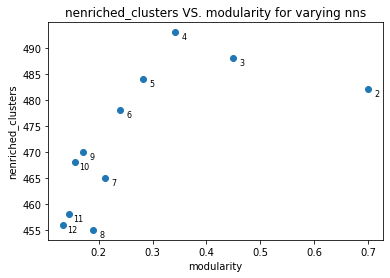

0.53


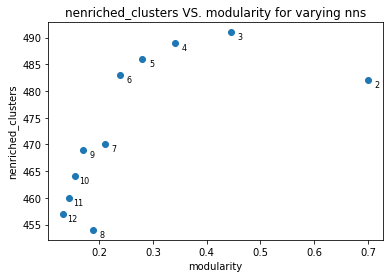

0.535


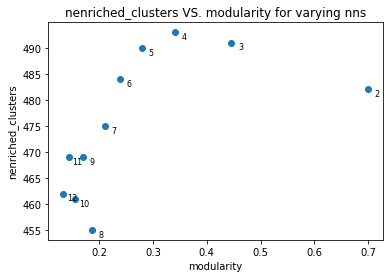

0.54


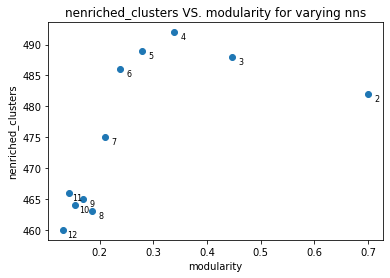

0.545


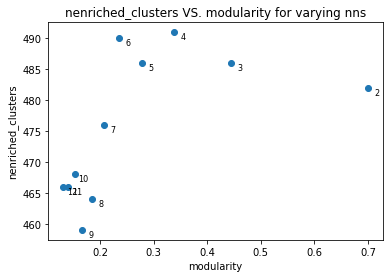

0.55


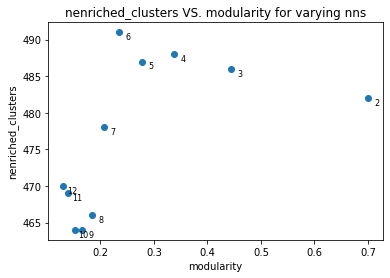

0.555


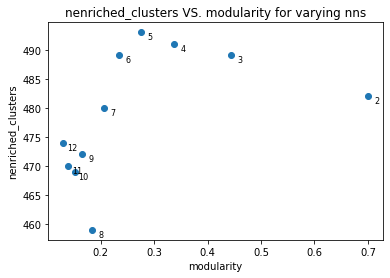

0.56


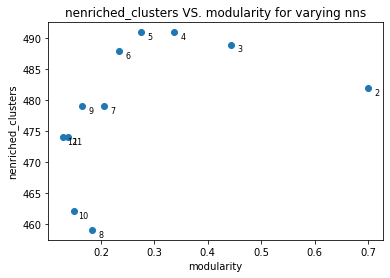

0.5650000000000001


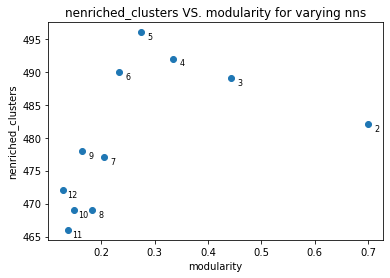

0.5700000000000001


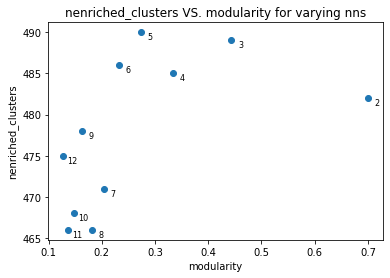

0.5750000000000001


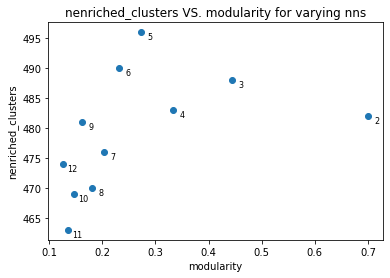

0.5800000000000001


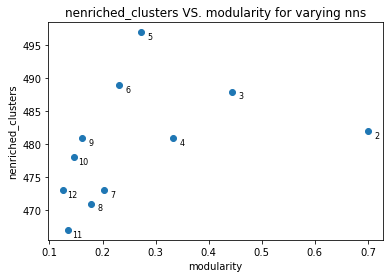

0.585


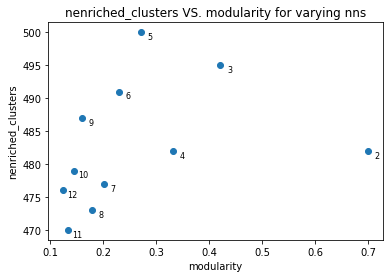

0.59


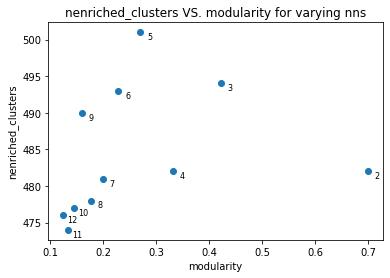

0.595


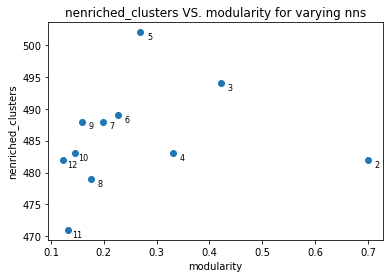

0.6


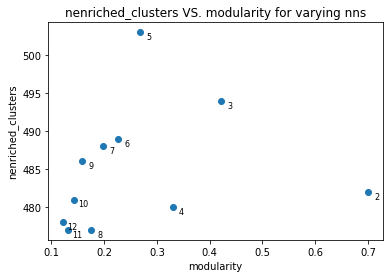

0.605


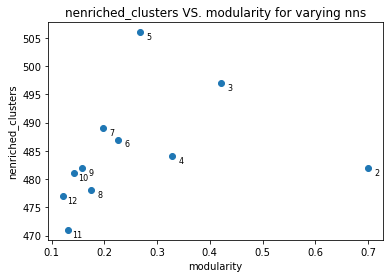

0.61


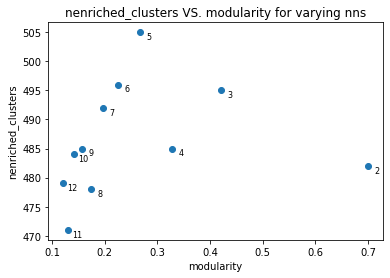

0.615


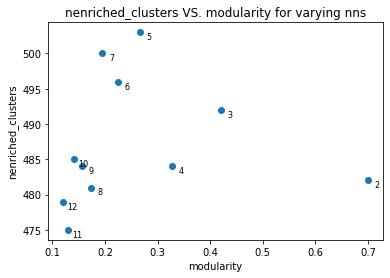

0.62


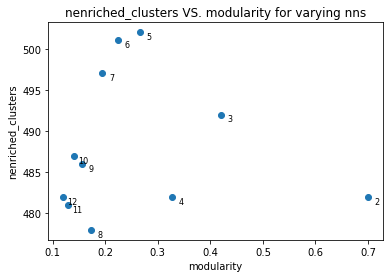

0.625


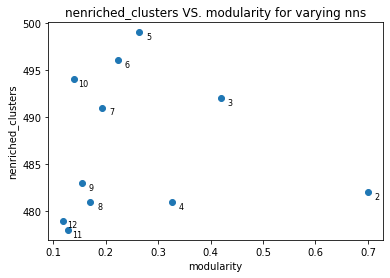

0.63


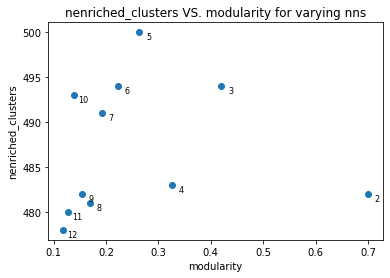

0.635


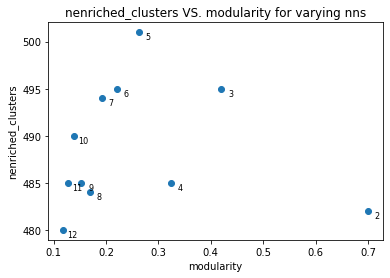

0.64


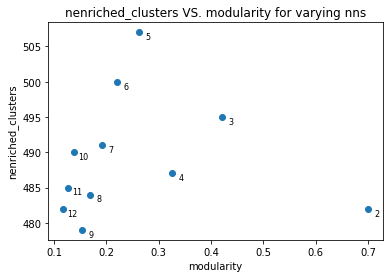

0.645


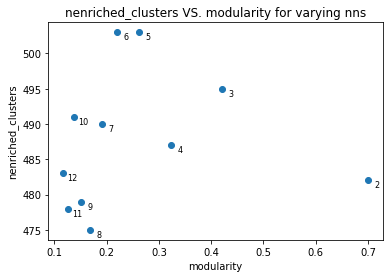

0.65


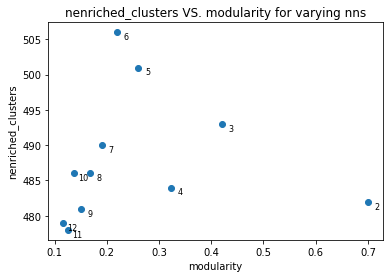

0.655


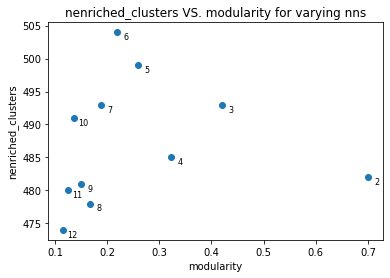

0.66


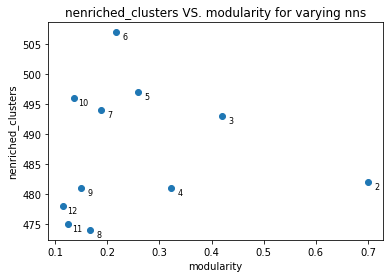

0.665


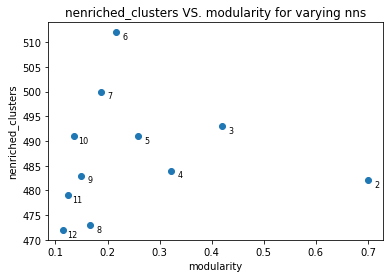

0.67


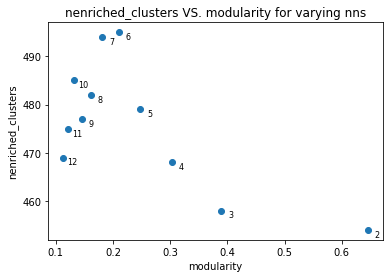

0.675


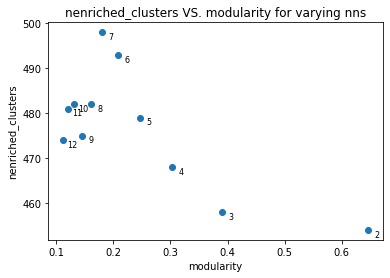

0.68


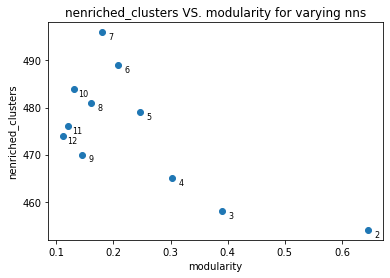

0.685


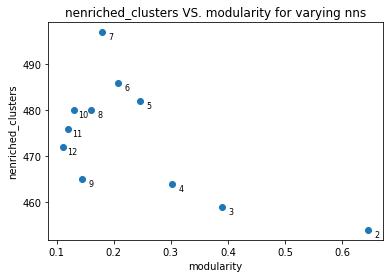

0.6900000000000001


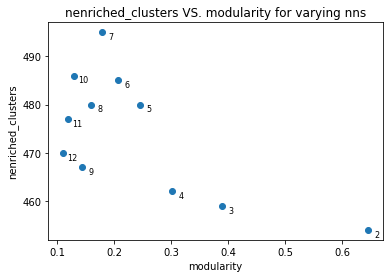

0.6950000000000001


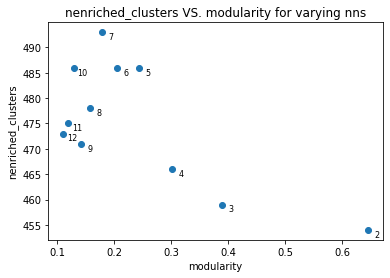

0.7000000000000001


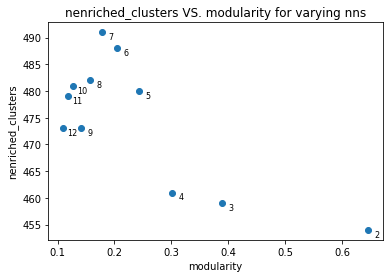

0.7050000000000001


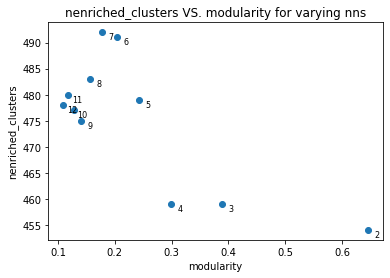

0.71


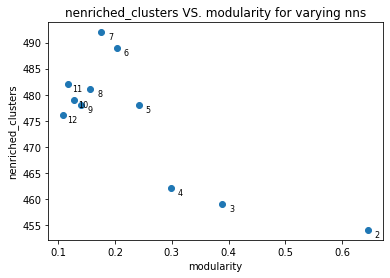

0.715


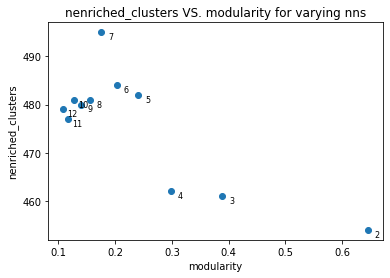

0.72


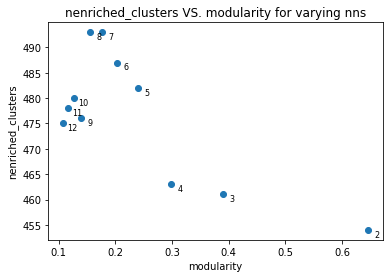

0.725


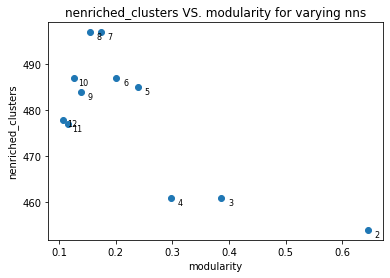

0.73


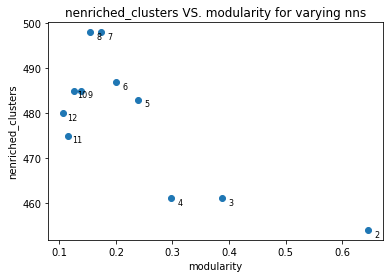

0.735


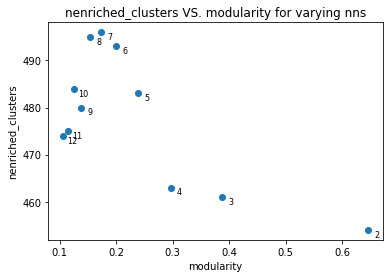

0.74


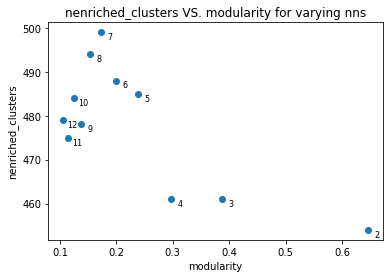

0.745


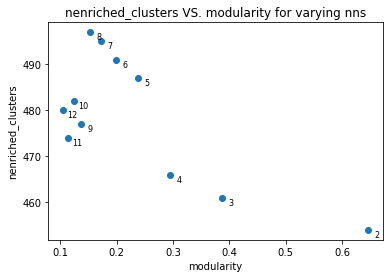

0.75


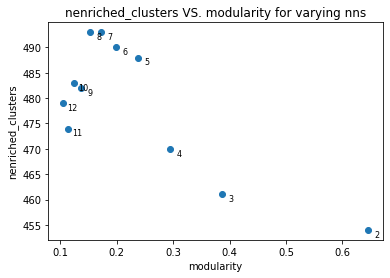

0.755


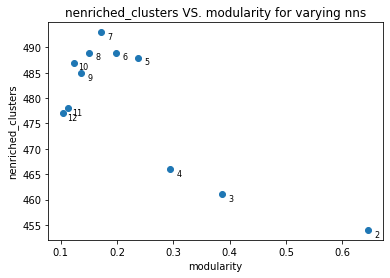

0.76


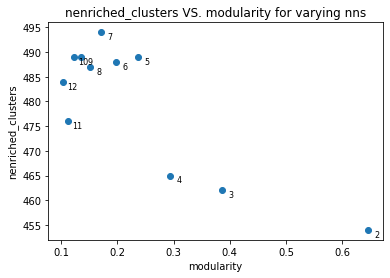

0.765


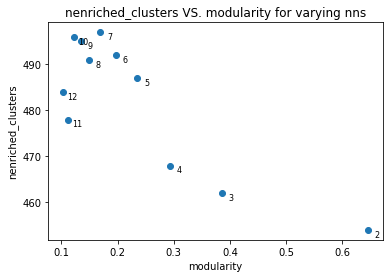

0.77


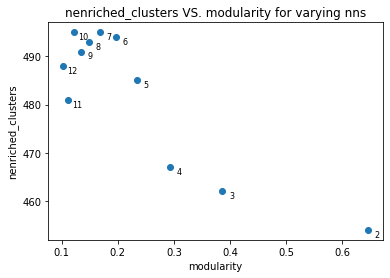

0.775


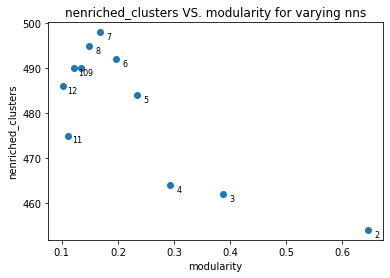

0.78


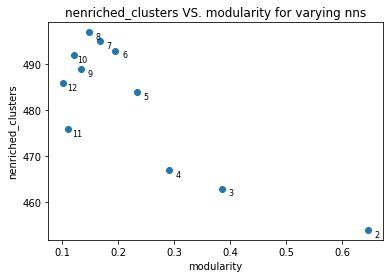

0.785


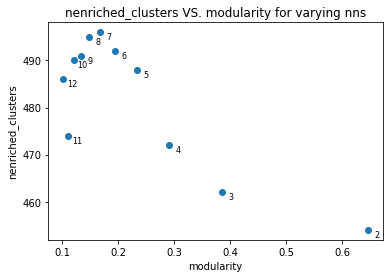

0.79


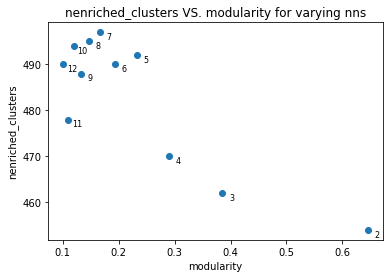

0.795


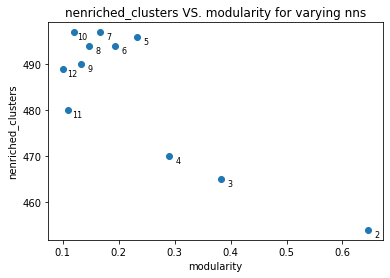

0.8


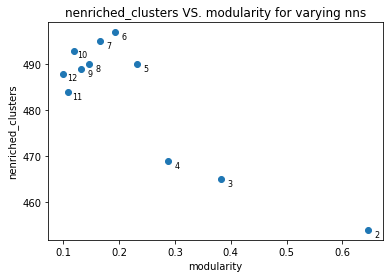

0.805


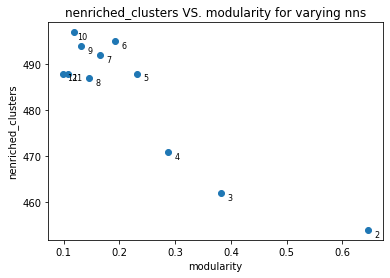

0.81


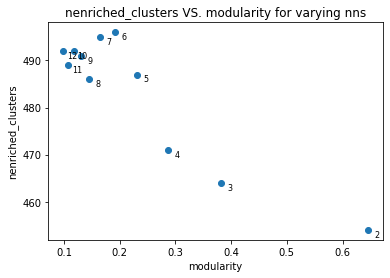

0.8150000000000001


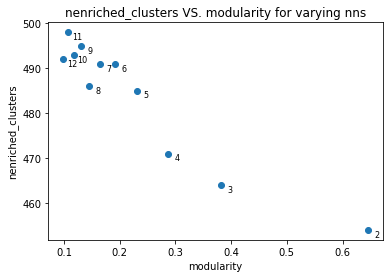

0.8200000000000001


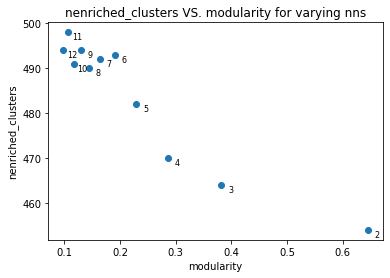

0.8250000000000001


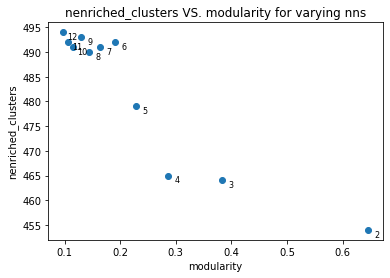

0.8300000000000001


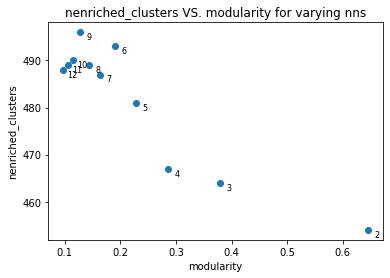

0.8350000000000001


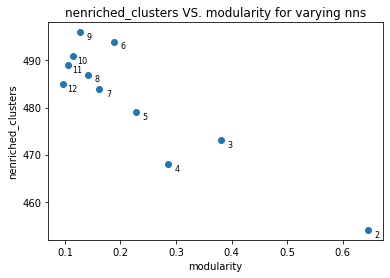

0.84


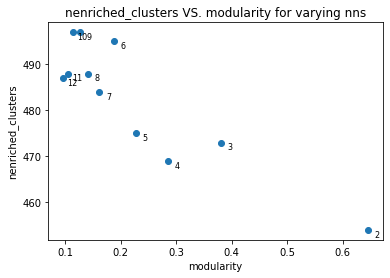

0.845


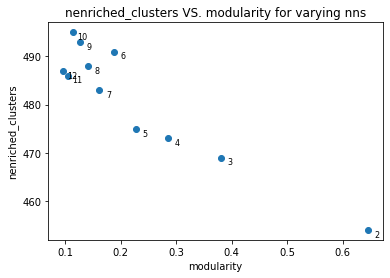

0.85


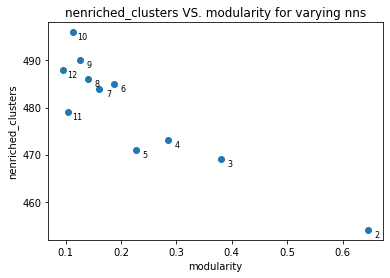

0.855


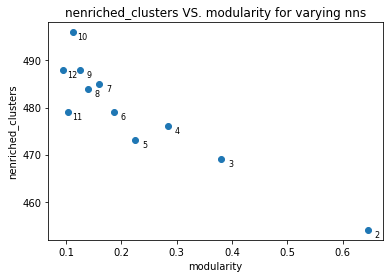

0.86


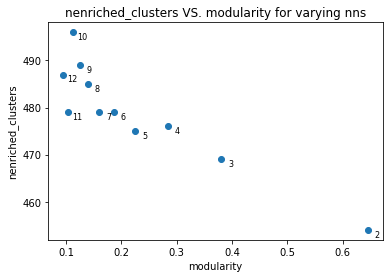

0.865


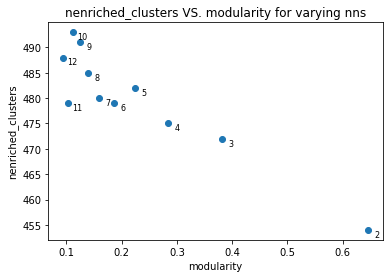

0.87


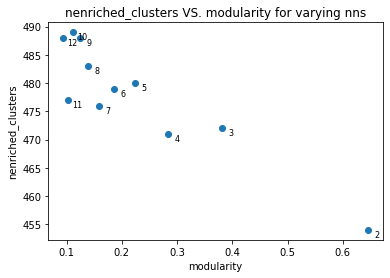

0.875


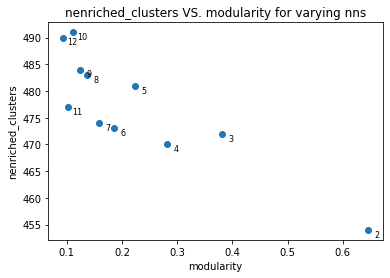

0.88


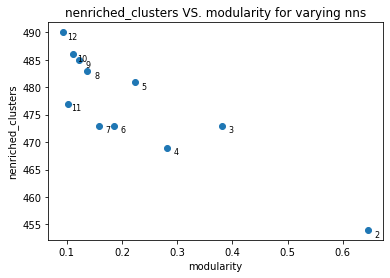

0.885


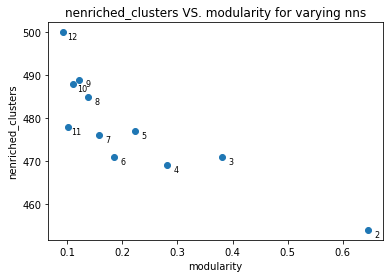

0.89


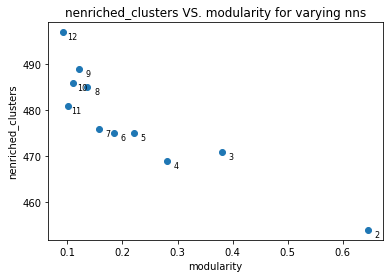

0.895


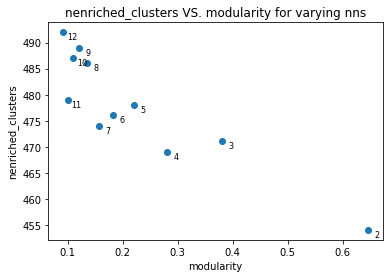

0.9


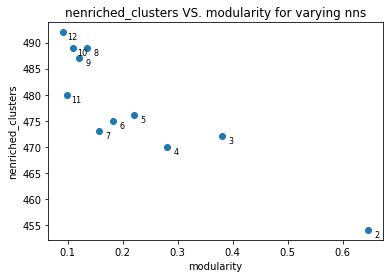

0.905


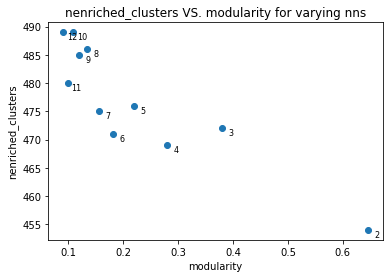

0.91


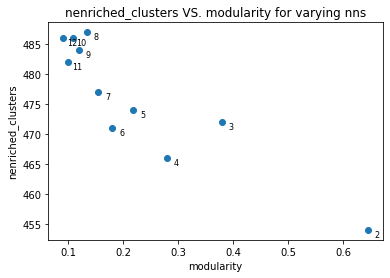

0.915


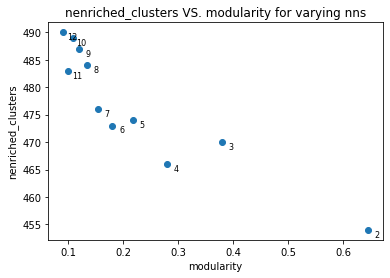

0.92


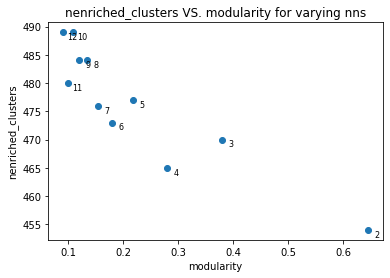

0.925


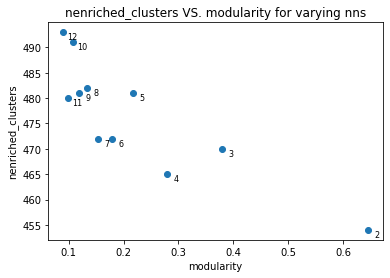

0.93


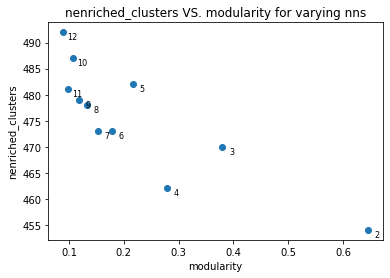

0.935


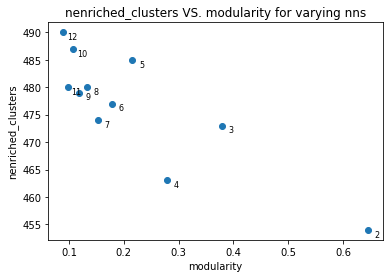

0.94


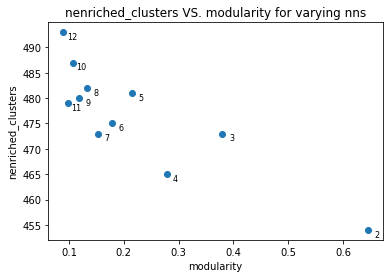

0.945


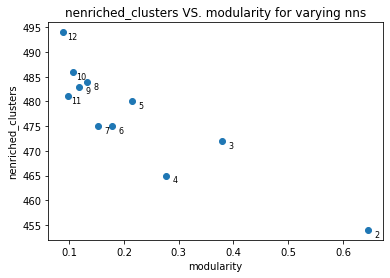

0.95


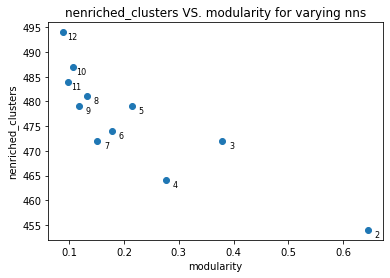

0.955


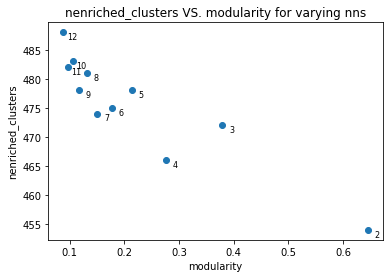

0.96


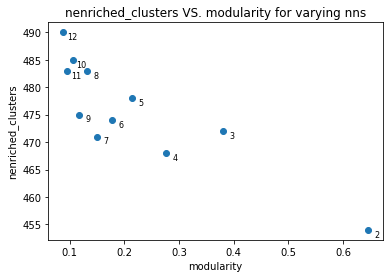

0.965


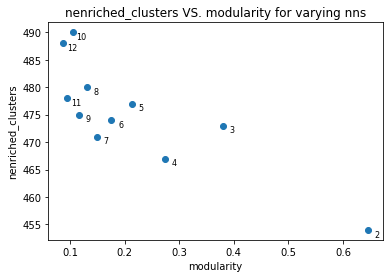

0.97


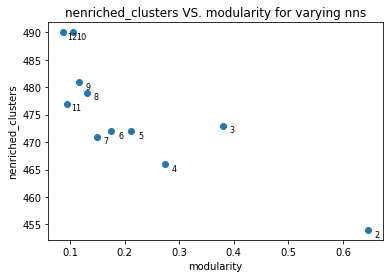

0.975


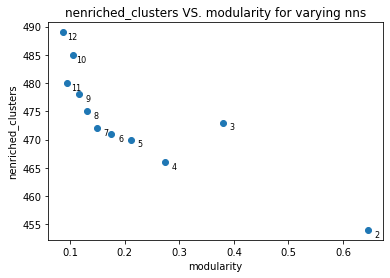

0.98


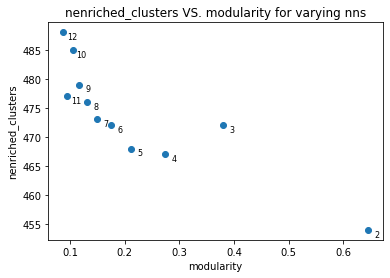

0.985


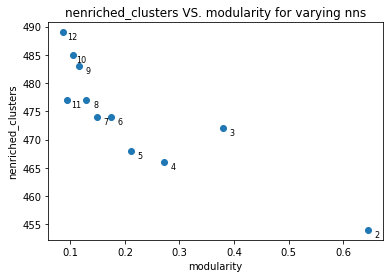

0.99


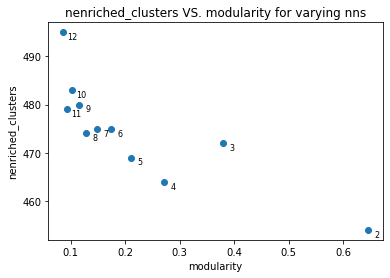

0.995


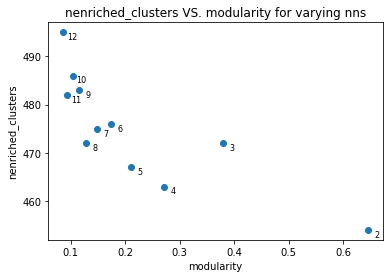

1.0


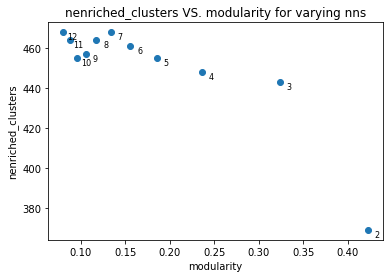

1.005


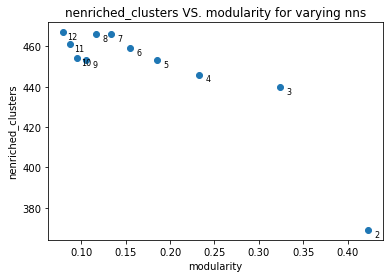

1.01


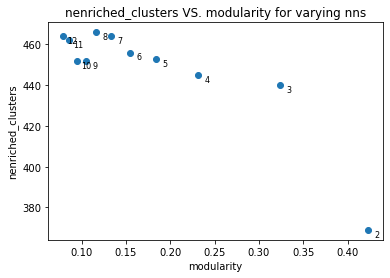

1.015


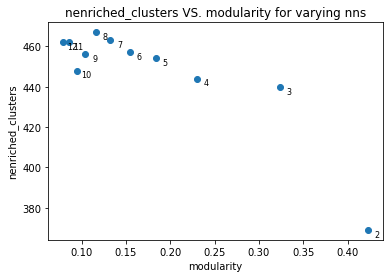

1.02


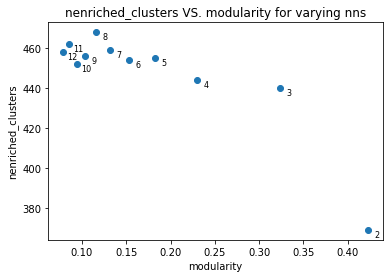

1.025


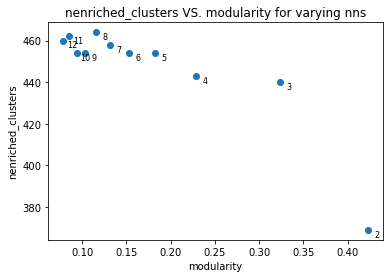

1.0299999999999998


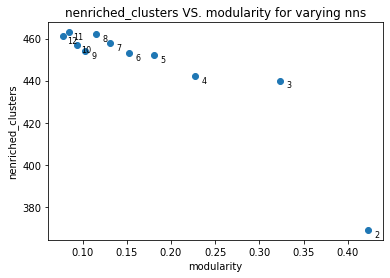

1.035


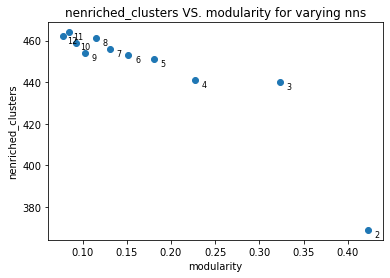

1.0399999999999998


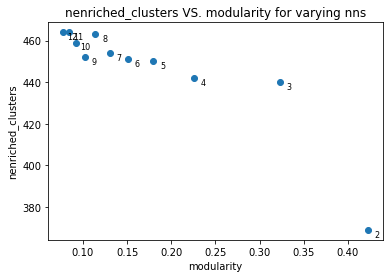

1.045


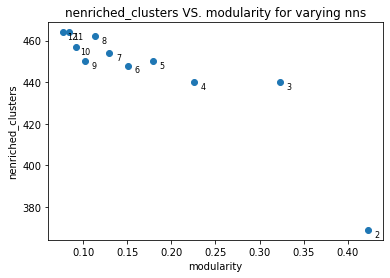

1.0499999999999998


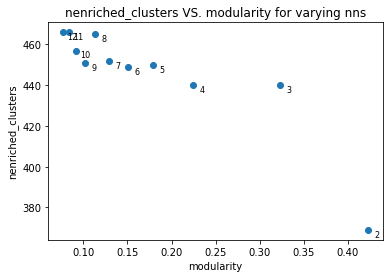

1.055


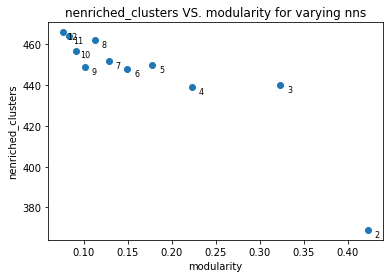

1.0599999999999998


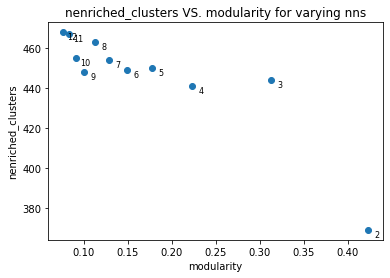

1.065


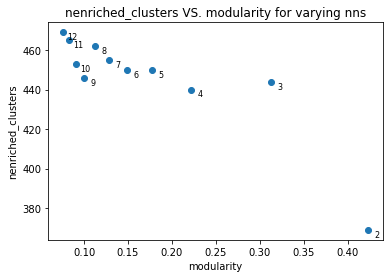

1.0699999999999998


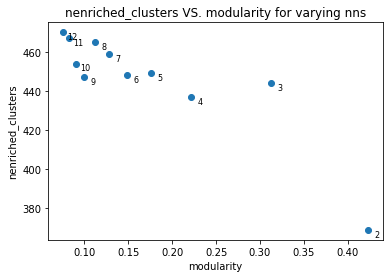

1.075


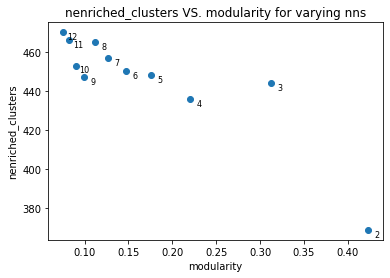

1.0799999999999998


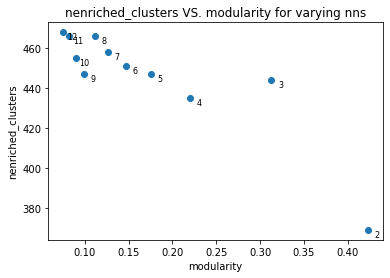

1.085


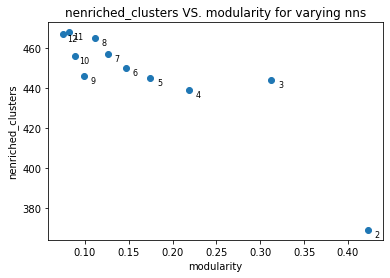

1.09


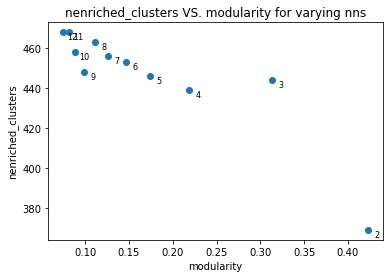

1.095


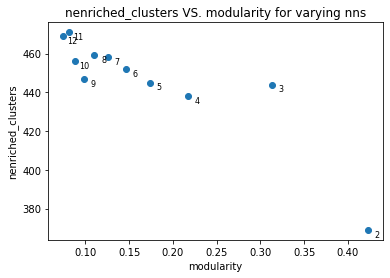

1.1


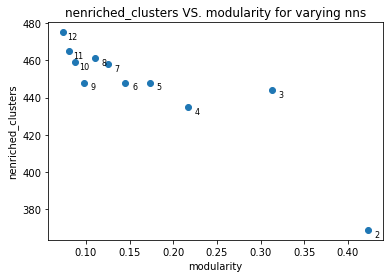

In [128]:
for p in sorted(df_stats_true['parameter'].unique()):
    df = df_stats_true.loc[
        # (df_stats_true['nns'] == 6) & 
        (df_stats_true['parameter'] == p) & 

        (df_stats_true['dimensionality'] == 'baseline') &
        (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
        (df_stats_true['clustering'] == 'leiden_cpm') &
        (df_stats_true['metric'] == plotting_metric) &
        (df_stats_true['nclusters'] > 50)
    ]

    y = 'nenriched_clusters'
    # y = 'num_clusters_fraction_of_genes_enriched'

    # x = 'silhouette_score'
    x = 'modularity'

    # labels = 'parameter'
    labels = 'nns'

    # Create scatter plot
    plt.scatter(df[x].values, df[y].values)

    label_adj = (df[x].max() - df[x].min()) * 0.03

    # Label each point with the number of nearest neighbors below the point
    for i, txt in enumerate(df[labels].values):
        plt.text(df[x].values[i] + label_adj, df[y].values[i], str(txt),
                fontsize=8, ha='center', va='top', color='black')

    # Set axis labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} VS. {x} for varying {labels}')

    # Display the plot
    print(p)
    plt.show()